#1. PERKENALAN

In [ ]:
'''
Nama      : Rugaya Muksin BSA
Batch     : 006
Phase     : 1
Milestone : 1

Dataset yang akan diolah terkait dengan kampanye pemasaran langsung dari lembaga 
perbankan Portugis. Dimana dengan data ini akan dibangun model berbasis machine 
learning, dan akan digunakan untuk memprediksi apakah prospek yang akan diprospek
akan melakukan deposit/tidak

'''

#2. IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('fivethirtyeight')

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#3. DATA LOADING

In [2]:
bank_ori = pd.read_csv('bank-additional-full.csv', delimiter=';')

In [3]:
bank = bank_ori.copy()
bank.shape

(41188, 21)

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#4. DATA CLEANING

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
'''
Cek jumlah dan presentase missing value pada setiap variabel yang ada dalam
dataset.

'''

mv = pd.DataFrame(bank.isnull().sum(), columns=['No. of missing values'])
mv['% missing_values'] = (mv/len(bank)).round(2)*100
mv

,No. of missing values,% missing_values
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
month,0,0.0
day_of_week,0,0.0


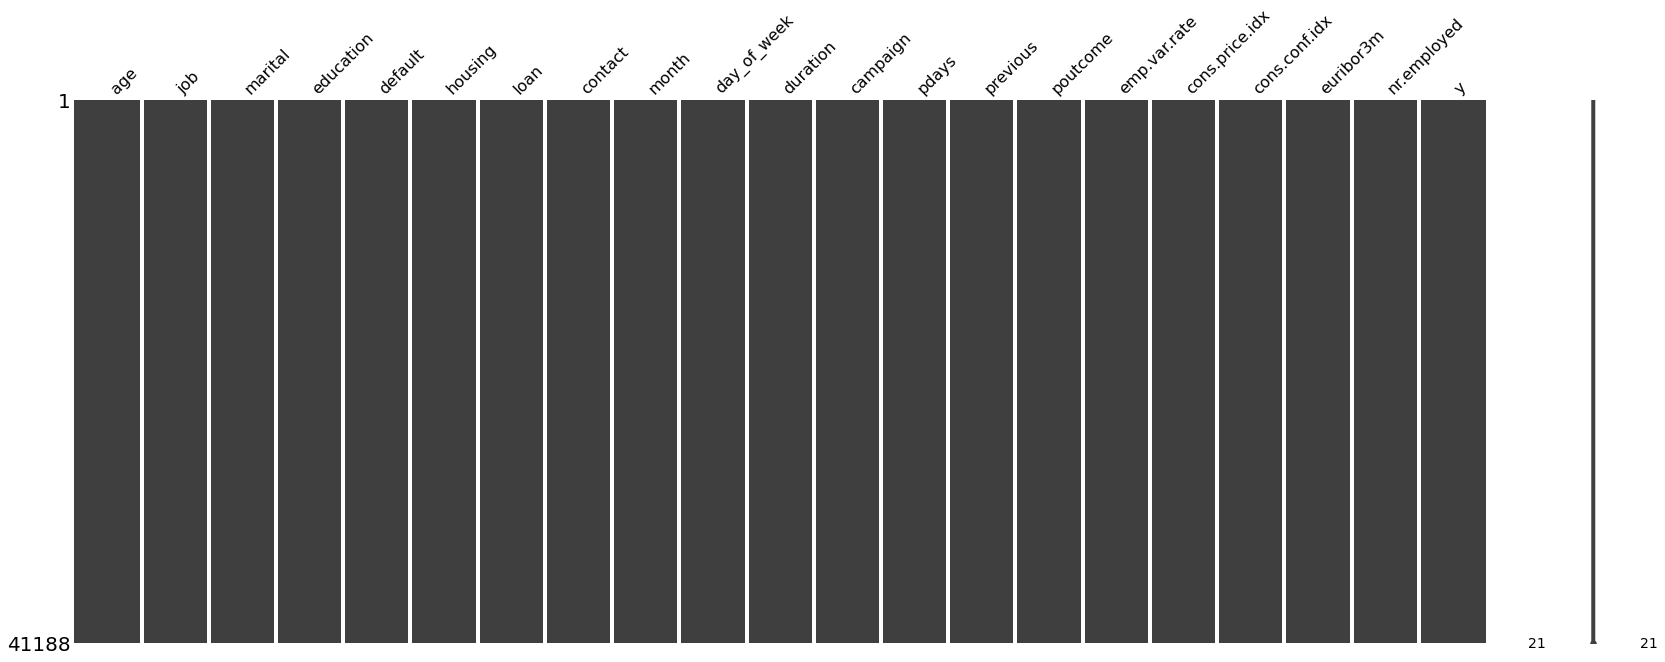

In [7]:
import missingno as msno

msno.matrix(bank)  # just to visualize. no missing value.

Tampaknya dataset yang akan digunakan bersih dari missing value.

#5. EDA

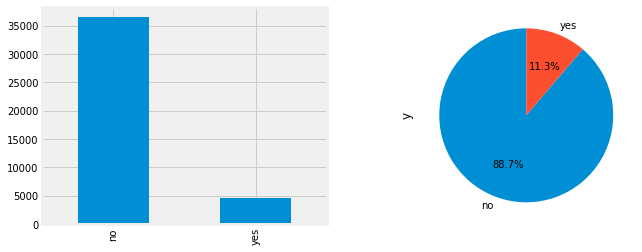

In [8]:
'''
Visualisasi variabel target (y)

'''

fig, axs = plt.subplots(ncols=2, figsize=(10,4))
bank['y'].value_counts().plot(kind='bar', ax=axs[0])
bank['y'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

*   Target dari variabel y memiliki 2 value, yaitu Yes and No
*   88.7% dari hasilnya adalah No, dan 11.3% adalah Yes
*   Terlihat bahwa jumlah antara Yes dan No pada dataset tidak seimbang (imbalanced), sehingga perlu digunakan stratified agar menjaga keseimbangan data pada target saat displit.

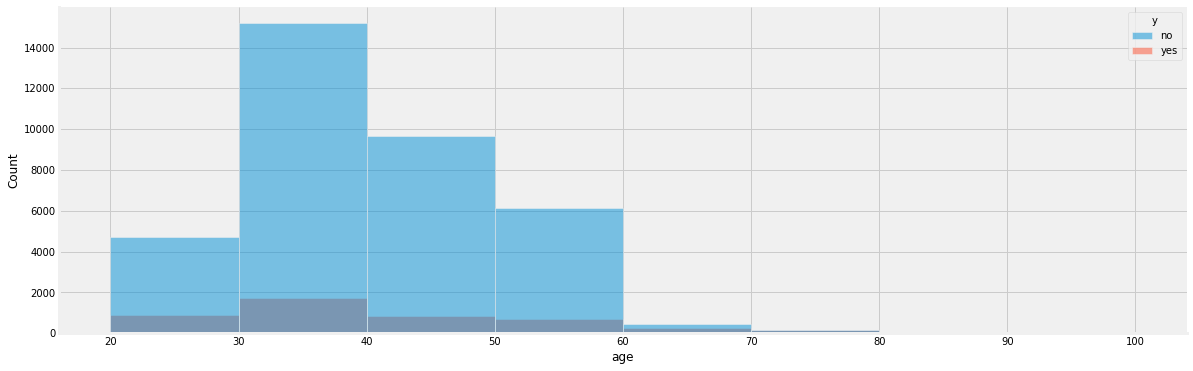

In [19]:
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(18, 6))
sns.histplot(data=bank, x="age", bins=bins, hue="y");
sns.despine(top=True, right=True)

*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan rentang usia 30-40
*   Prospek dengan rentang usia 30-40 banyak melakukan deposit


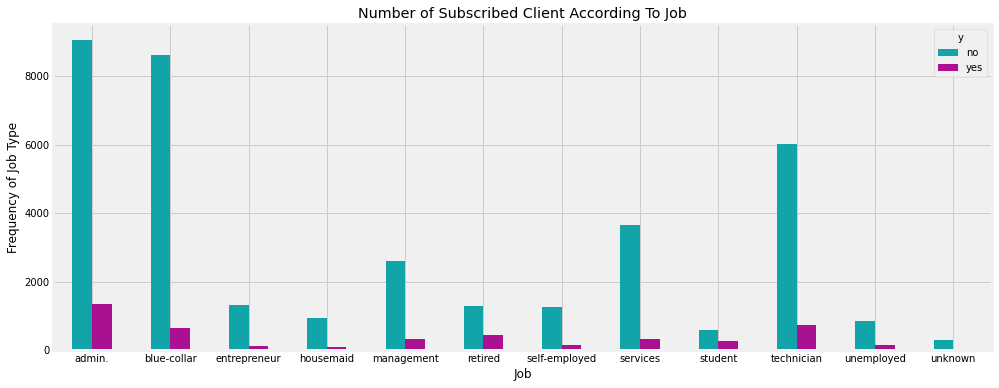

In [23]:
pd.crosstab(bank.job, bank.y).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Number of Subscribed Client According To Job')
plt.xlabel('Job')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Job Type')
plt.show()

*   Sosialisasi/kampanye partisipannya banyak di dominasi oleh prospek dengan job admin dan blue-collar usia 30-40
*   Prospek yang bekerja di posisi administrasi membuat deposit paling tinggi diikuti oleh teknisi dan karyawan blue-collar



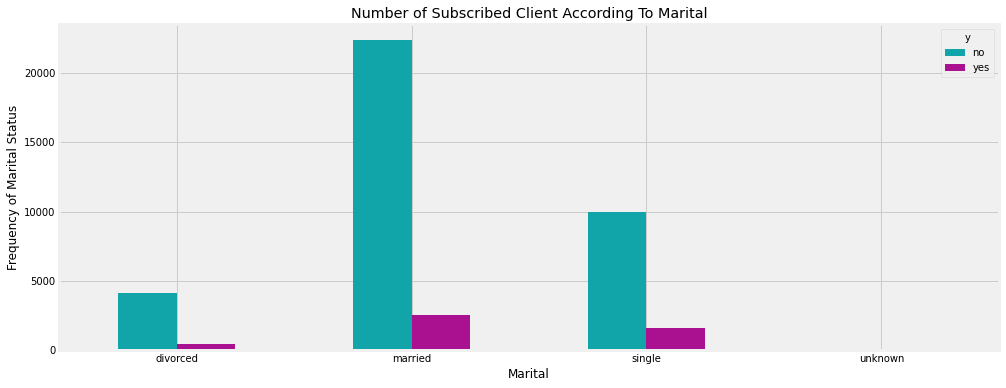

In [25]:
pd.crosstab(bank.marital, bank.y).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Number of Subscribed Client According To Marital')
plt.xlabel('Marital')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Marital Status')
plt.show()

*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan marital status married
*   Prospek yang sudah menikah telah membuat setoran tinggi dan diikuti oleh single


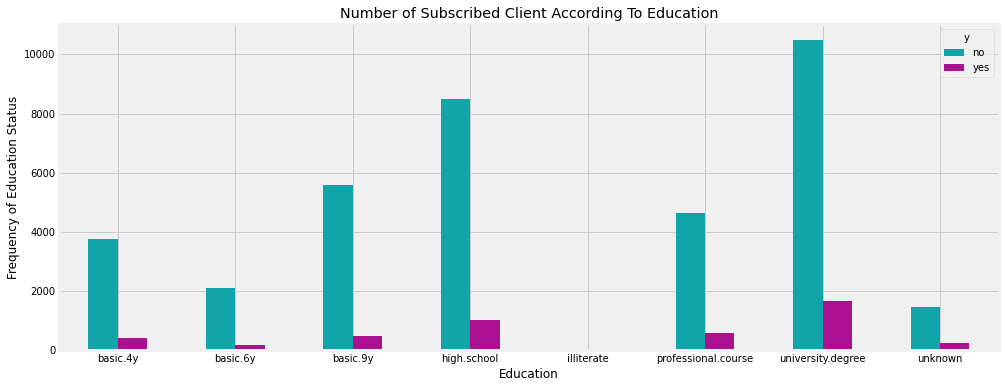

In [28]:
pd.crosstab(bank.education, bank.y).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Number of Subscribed Client According To Education')
plt.xlabel('Education')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Education Status')
plt.show()

*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan education status university.degree dan high.school
*   Prospek yang memiliki setidaknya gelar universitas telah melakukan setoran diikuti oleh sekolah menengah

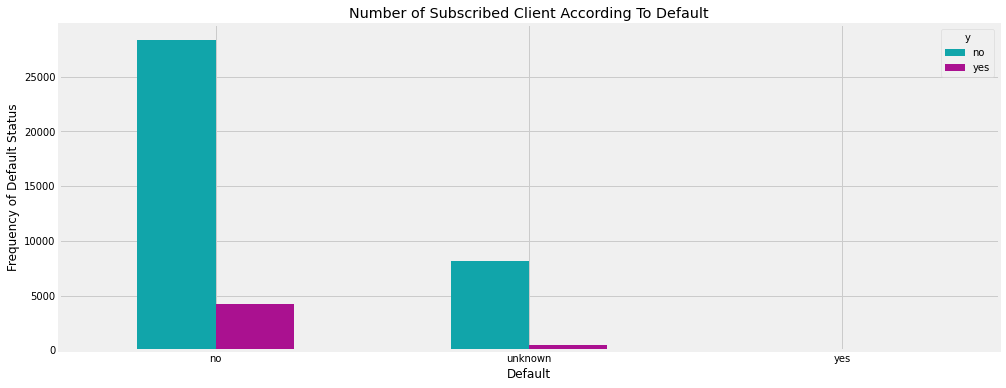

In [31]:
pd.crosstab(bank.default, bank.y).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Number of Subscribed Client According To Default')
plt.xlabel('Default')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Default Status')
plt.show()

In [40]:
countNoDefaultDeposit = len(bank[bank.default == 'no'])
countHaveDefaultDeposit = len(bank[bank.default == 'yes'])
countUnknownDefaultDeposit = len(bank[bank.default == 'unknown'])
print("Number of Subscribed Client with No Default Deposit: {:.2f}%".format((countNoDefaultDeposit / (len(bank.default))*100)))
print("Number of Subscribed Client with Yes Default Deposit: {:.2f}%".format((countHaveDefaultDeposit / (len(bank.default))*100)))
print("Number of Subscribed Client with Yes Default Deposit: {:.2f}%".format((countUnknownDefaultDeposit / (len(bank.default))*100)))

Number of Subscribed Client with No Default Deposit: 79.12%
Number of Subscribed Client with Yes Default Deposit: 0.01%
Number of Subscribed Client with Yes Default Deposit: 20.87%


*   Terlihat bahwa prospek dengan default no deposit mendominasi data yang kita miliki
*   Prospek no default lebih banyak melakukan deposit dibandingkan dengan kategori default lainnya
*   Keberadaan kategori unknown pada fitur default agak rancu keberadaannya karena tidak merepresentasikan suatu keadaan yang jelas, untuk treatmentnya akan dilakukan pada preprocessing data

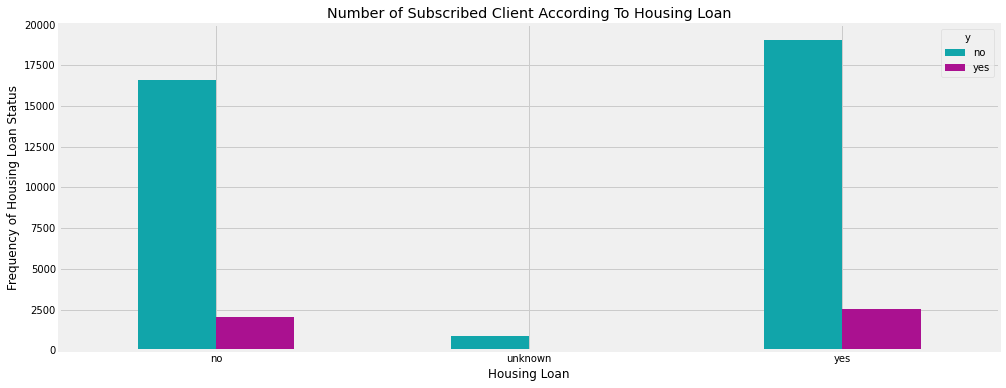

In [37]:
pd.crosstab(bank.housing, bank.y).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Number of Subscribed Client According To Housing Loan')
plt.xlabel('Housing Loan')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Housing Loan Status')
plt.show()

In [52]:
countNoHousingLoan = len(bank[bank.housing == 'no'])
countHaveHousingLoan = len(bank[bank.housing == 'yes'])
countUnknownHousingLoan = len(bank[bank.housing == 'unknown'])
print("Number of Client with No Housing Loan: {:.2f}%".format((countNoHousingLoan / (len(bank.housing))*100)))
print("Number of Client with Yes Housing Loan: {:.2f}%".format((countHaveHousingLoan / (len(bank.housing))*100)))
print("Number of Client with Unknown Housing Loan: {:.2f}%".format((countUnknownHousingLoan / (len(bank.housing))*100)))

Number of Client with No Housing Loan: 45.21%
Number of Client with Yes Housing Loan: 52.38%
Number of Client with Unknown Housing Loan: 2.40%


*   Terlihat bahwa prospek yang memiliki housing loan (pinjaman/kredit rumah) mendominasi data yang kita miliki
*   Prospek yang memiliki housing loan (pinjaman/kredit rumah) lebih banyak melakukan deposit dibandingkan dengan prospek yang tidak memiliki housing loan
*   Keberadaan kategori unknown pada fitur housing loan agak rancu keberadaannya karena tidak merepresentasikan suatu keadaan yang jelas, untuk treatmentnya akan dilakukan pada preprocessing data

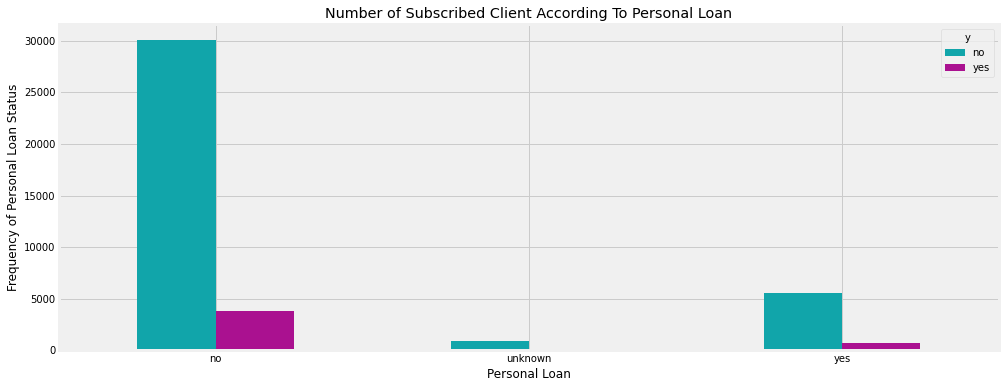

In [42]:
pd.crosstab(bank.loan, bank.y).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Number of Subscribed Client According To Personal Loan')
plt.xlabel('Personal Loan')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Personal Loan Status')
plt.show()

In [51]:
countNoPersonalLoan = len(bank[bank.loan == 'no'])
countHavePersonalLoan = len(bank[bank.loan == 'yes'])
countUnknownPersonalLoan = len(bank[bank.loan == 'unknown'])
print("Number of Client with No Personal Loan: {:.2f}%".format((countNoPersonalLoan / (len(bank.loan))*100)))
print("Number of Client with Yes Personal Loan: {:.2f}%".format((countHavePersonalLoan / (len(bank.loan))*100)))
print("Number of Client with Unknown Personal Loan: {:.2f}%".format((countUnknownPersonalLoan / (len(bank.loan))*100)))

Number of Client with No Personal Loan: 82.43%
Number of Client with Yes Personal Loan: 15.17%
Number of Client with Unknown Personal Loan: 2.40%


*   Terlihat bahwa prospek yang tidak memiliki personal loan (pinjaman/kredit pribadi) mendominasi data yang kita miliki
*   Prospek yang tidak memiliki personal loan (pinjaman/kredit pribadi) lebih banyak melakukan deposit dibandingkan dengan prospek yang memiliki personal loan
*   Keberadaan kategori unknown pada fitur personal loan agak rancu keberadaannya karena tidak merepresentasikan suatu keadaan yang jelas, untuk treatmentnya akan dilakukan pada preprocessing data

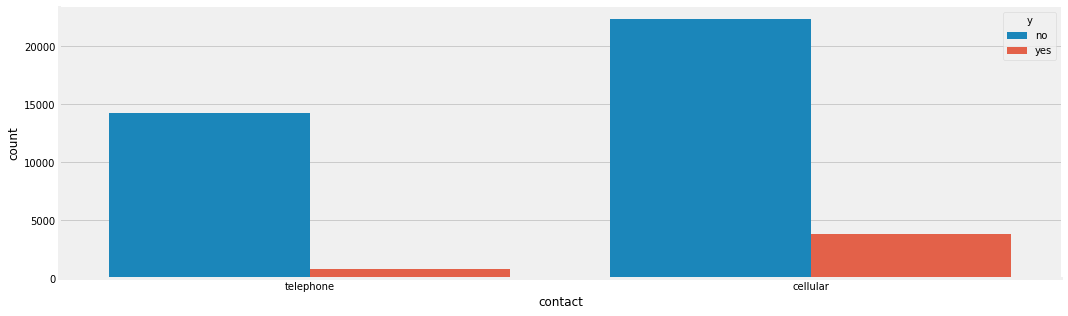

In [46]:
plt.figure(figsize=(16, 5))
sns.countplot(data=bank, x="contact", hue="y");
sns.despine(top=True, right=True)

*   Kampanye/sosialisasi lebih banyak dilakukan melalui cellular contact
*   Prospek positif banyak didapatkan melalui cellular contact



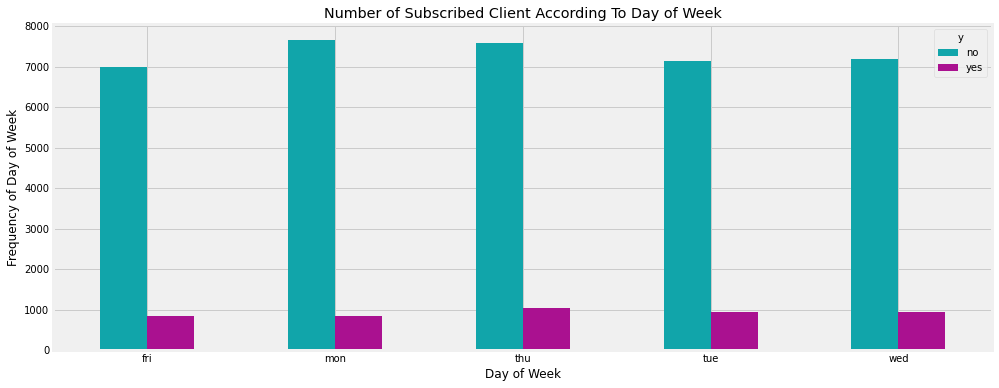

In [48]:
pd.crosstab(bank.day_of_week, bank.y).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Number of Subscribed Client According To Day of Week')
plt.xlabel('Day of Week')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Day of Week')
plt.show()

In [50]:
countMon = len(bank[bank.day_of_week == 'mon'])
countThu = len(bank[bank.day_of_week == 'thu'])
countWed = len(bank[bank.day_of_week == 'wed'])
countTue = len(bank[bank.day_of_week == 'tue'])
countFri = len(bank[bank.day_of_week == 'fri'])
print("Number of Client on Monday: {:.2f}%".format((countMon / (len(bank.day_of_week))*100)))
print("Number of Client on Thursday: {:.2f}%".format((countThu / (len(bank.day_of_week))*100)))
print("Number of Client on Wednesday: {:.2f}%".format((countWed / (len(bank.day_of_week))*100)))
print("Number of Client on Tuesday: {:.2f}%".format((countTue / (len(bank.day_of_week))*100)))
print("Number of Client on Friday: {:.2f}%".format((countFri / (len(bank.day_of_week))*100)))

Number of Client on Monday: 20.67%
Number of Client on Thursday: 20.94%
Number of Client on Wednesday: 19.75%
Number of Client on Tuesday: 19.64%
Number of Client on Friday: 19.00%


*   Prospek lebih banyak ditemukan pada hari senin selama berjalannya kampanye/sosialisasi
*   Prospek positif banyak didapatkan pada hari rabu selama berjalannya kampanye/sosialisasi

In [ ]:
'''
Campaign vs duration call

'''

import plotly.express as px

fig = px.scatter(bank, x="campaign", y="duration", color="y")
fig.show()

*   Semakin banyak durasi panggilan, prospek memiliki kemungkinan lebih tinggi dalam melakukan deposit 
*   Durasi panggilan memudar saat periode waktu kampanye diperpanjang
*   Ada banyak prospek positif di hari-hari awal kampanye





<BarContainer object of 41188 artists>

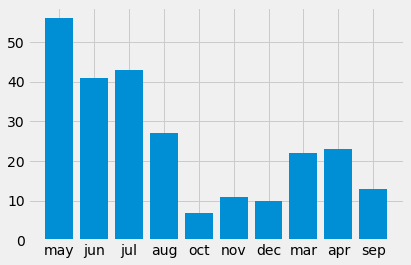

In [ ]:
plt.bar(bank['month'], bank['campaign'])

*   Kita bisa melihat kampanye sebagian besar terkonsentrasi di awal periode bank (Mei, Juni dan Juli)
*   Biasanya masa pendidikan dimulai pada saat itu sehingga ada kemungkinan orang tua menyetor atas nama anaknya
*   Mereka juga melakukan kampanye di akhir periode bank.





# **KESIMPULAN BASED ON EDA**

---
**KESIMPULAN BASED ON EDA**

---

*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan rentang usia 30-40
*   Prospek dengan rentang usia 30-40 banyak melakukan deposit
*   Sosialisasi/kampanye partisipannya banyak di dominasi oleh prospek dengan job admin dan blue-collar usia 30-40
*   Prospek yang bekerja di posisi administrasi membuat deposit paling tinggi diikuti oleh teknisi dan karyawan blue-collar
*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan marital status married
*   Prospek yang sudah menikah telah membuat setoran tinggi dan diikuti oleh single
*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan education status university.degree dan high.school
*   Prospek yang memiliki setidaknya gelar universitas telah melakukan setoran diikuti oleh sekolah menengah
*   Terlihat bahwa prospek dengan default no deposit mendominasi data yang kita miliki
*   Prospek no default lebih banyak melakukan deposit dibandingkan dengan kategori default lainnya
*   Terlihat bahwa prospek yang memiliki housing loan (pinjaman/kredit rumah) mendominasi data yang kita miliki
*   Prospek yang memiliki housing loan (pinjaman/kredit rumah) lebih banyak melakukan deposit dibandingkan dengan prospek yang tidak memiliki housing loan
*   Terlihat bahwa prospek yang tidak memiliki personal loan (pinjaman/kredit pribadi) mendominasi data yang kita miliki
*   Prospek yang tidak memiliki personal loan (pinjaman/kredit pribadi) lebih banyak melakukan deposit dibandingkan dengan prospek yang memiliki personal loan
*   Kampanye/sosialisasi lebih banyak dilakukan melalui cellular contact
*   Prospek positif banyak didapatkan melalui cellular contact
*   Prospek lebih banyak ditemukan pada hari senin selama berjalannya kampanye/sosialisasi
*   Prospek positif banyak didapatkan pada hari rabu selama berjalannya kampanye/sosialisasi
*   Semakin banyak durasi panggilan, prospek memiliki kemungkinan lebih tinggi dalam melakukan deposit 
*   Durasi panggilan memudar saat periode waktu kampanye diperpanjang
*   Ada banyak prospek positif di hari-hari awal kampanye
*   Kita bisa melihat kampanye sebagian besar terkonsentrasi di awal periode bank (Mei, Juni dan Juli)
*   Biasanya masa pendidikan dimulai pada saat itu sehingga ada kemungkinan orang tua menyetor atas nama anaknya
*   Mereka juga melakukan kampanye di akhir periode bank.











#6. PREPROCESSING DATA

###6.1 MEMISAHKAN FITUR TARGET, NUMERIK DAN KATEGORIK

In [54]:
target = ['y']
num_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cat_cols = [i for i in bank.columns if i not in (target + num_cols)]

###6.2 VISUALISASI DISTRIBUSI DATA FITUR NUMERIK

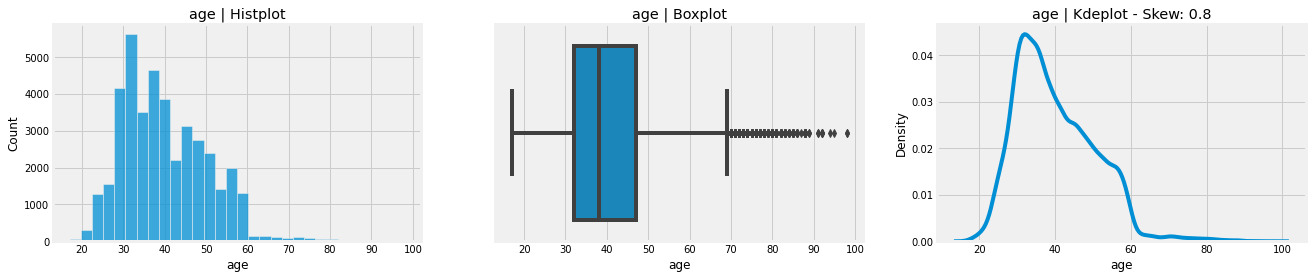

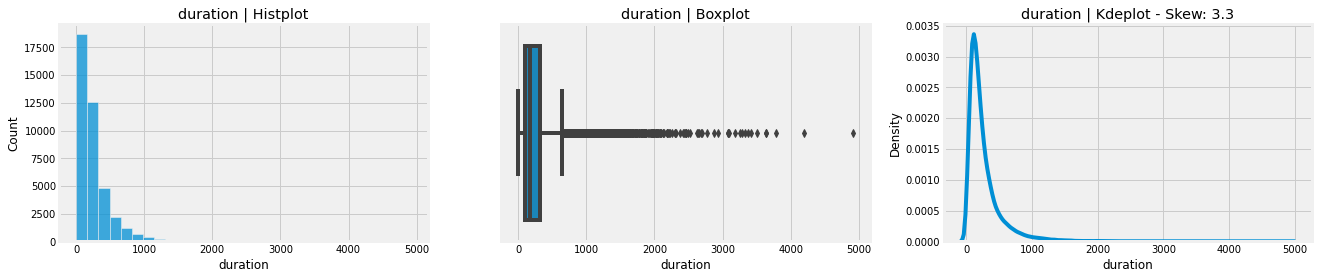

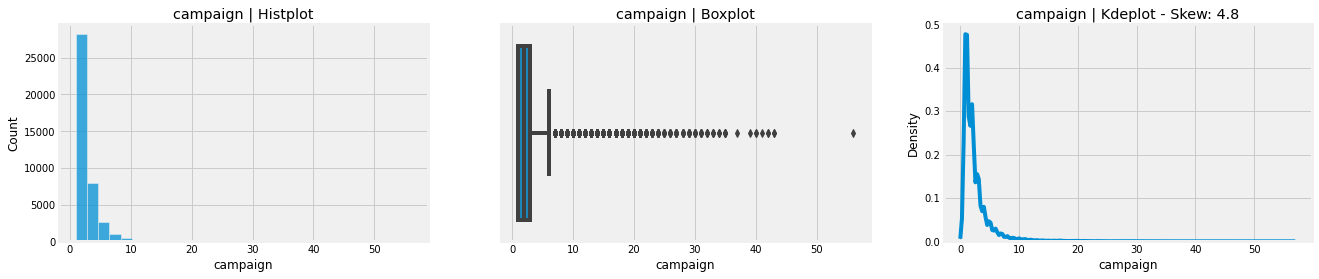

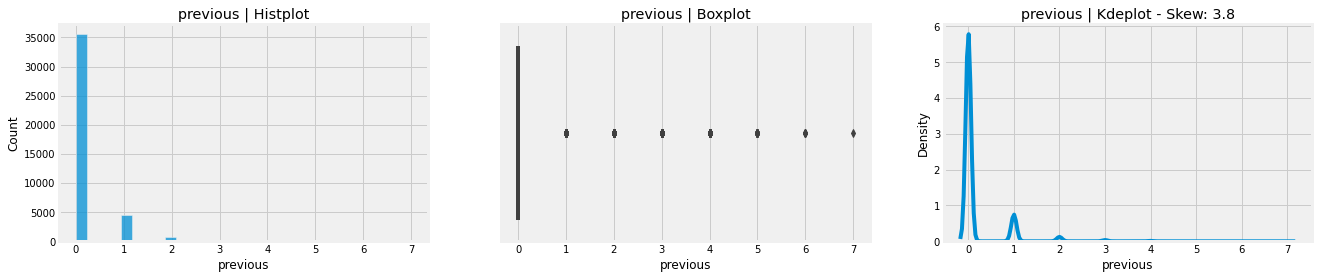

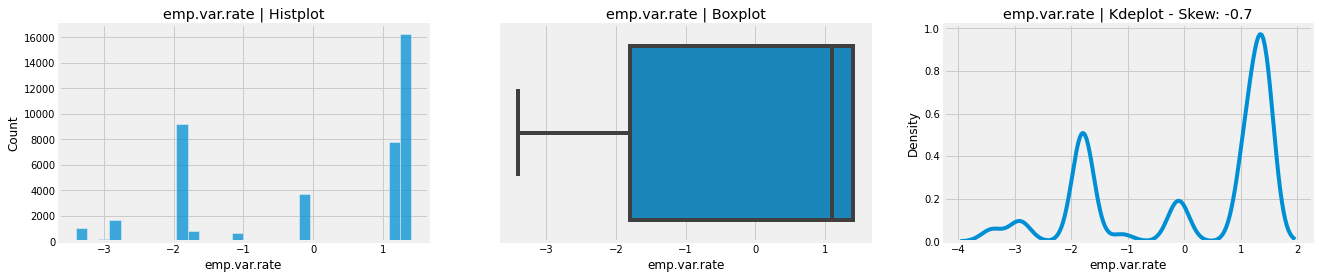

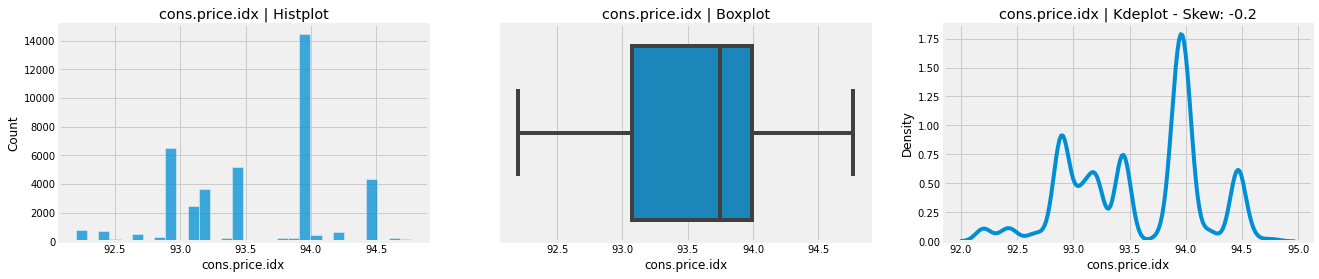

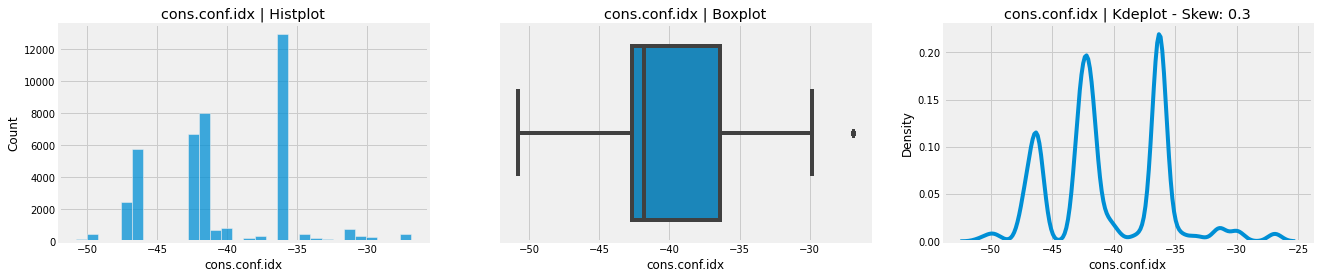

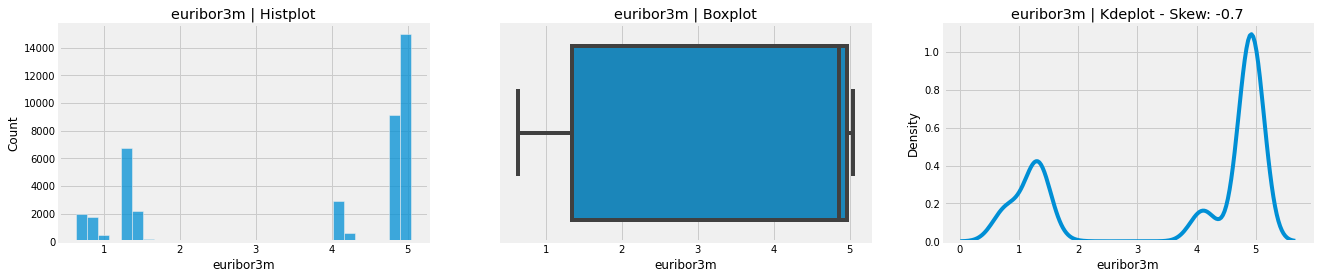

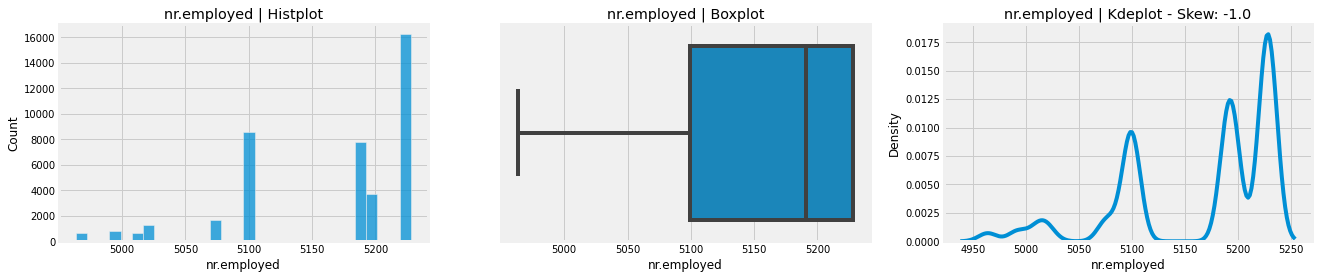

In [55]:
'''
Melihat jenis distribusi data dan outlier dari visualisasi fitur numerik yang 
ditampilkan

'''


for i in bank[num_cols].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=bank[i],ax=ax[0], bins=30)
    sns.boxplot(x=bank[i], ax=ax[1])
    sns.kdeplot(bank[i], ax=ax[2])
    skew_val=round(bank[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

Dari distribusi data pada fitur numerik, terlihat bahwa:


*   Variabel age, duration, campaign dan previous memiliki distribusi data yang miring/skewed. Variabel lainnya memiliki distribusi data normal dan bimodel.
*   Terdapat banyak variabel yang mengandung outlier. Logistic Regression dan SVM sensitif terhadap outlier, sehingga saya memutuskan akan handle outlier dengan trimming jika presentase outliernya kurang dari 3% dan di capping jika presentase outlier diatas 3% - 25%, diatas 25% tidak akan saya lakukan treatment apapun.


In [56]:
'''
Mengubah type variabel y ke numerik agar bisa diliat korelasinya dalam
heatmap

'''

bank['y'] = bank['y'].map({'yes' : 1, 'no' : 0})

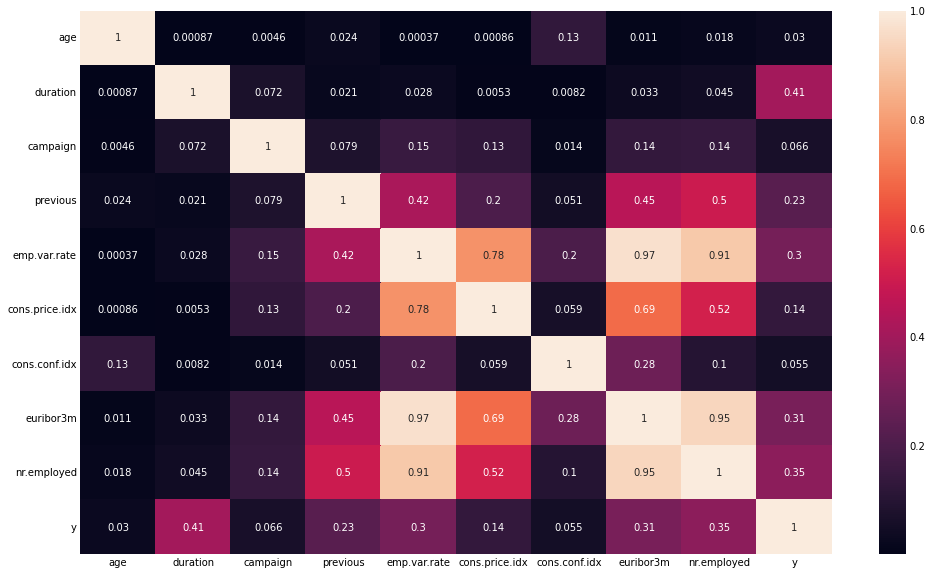

In [57]:
'''
Heatmap untuk pengecekan correlation fitur numerik terhadap taget

'''

plt.figure(figsize=(15, 10))
sns.heatmap(bank[num_cols + target].corr().abs(),  annot=True)
plt.show()

*   duration (0.41), nr.employed(0.35), euriborn3m(0.31), emp.var.rate(0.30) dan previous(0.23) merupakan fitur yang memiliki nilai korelasi tertinggi terhadap variabel target (y)

###6.3 HANDLING UNKNOWN KATEGORI 

Based on EDA, terdapat beberapa kategori yang tidak diketahui (unknown) di beberapa fitur (job, marital, education, housing loan, personal loan)

In [ ]:
bank.groupby(by=[cat_cols[0],'y'])['age'].count().to_frame()

age
job           y      
admin.        0  9070
              1  1352
blue-collar   0  8616
              1   638
entrepreneur  0  1332
              1   124
housemaid     0   954
              1   106
management    0  2596
              1   328
retired       0  1286
              1   434
self-employed 0  1272
              1   149
services      0  3646
              1   323
student       0   600
              1   275
technician    0  6013
              1   730
unemployed    0   870
              1   144
unknown       0   293
              1    37

Menurut saya keberadaan kategori unknown pada fitur job merupakan sesuatu hal yang beresiko. Pekerjaan seseorang dapat dijadikan sumber informasi mengenai sumber dana yang akan di deposit. Dan bisa manajemen resiko apabila ada dana yang berasal dari pencucian uang.

Sehingga saya memutuskan untuk menghapus unknown kategori pada fitur job

In [58]:
bank = bank[(bank.job !='unknown')]
bank.shape

(40858, 21)

In [59]:
bank.groupby(by=[cat_cols[1],'y'])['age'].count().to_frame()

age
marital  y       
divorced 0   4126
         1    473
married  0  22178
         1   2516
single   0   9889
         1   1605
unknown  0     62
         1      9

Based on EDA analysis, menurut saya status fitur marital memiliki pengaruh yang cukup besar dalam mendorong nasabah untuk melakukan deposit. Keberadaan kategori unknown pada fitur marital bukan sesuatu hal yang bisa diwajarkan dan dibiarkan, sehingga saya memutuskan untuk menghapus unknown kategori pada fitur marital.

In [60]:
bank = bank[(bank.marital !='unknown')]
bank.shape

(40787, 21)

In [ ]:
bank.groupby(by=[cat_cols[3],'y'])['age'].count().to_frame()

age
default y       
no      0  28391
        1   4197
unknown 0   8154
        1    443
yes     0      3

Keberadaan kategori unknown pada fitur default agak rancu keberadaannya karena tidak merepresentasikan suatu keadaan yang jelas, sehingga **saya memutuskan untuk menghilangkan kategori unknown pada fitur default.**

In [61]:
bank = bank[(bank.default !='unknown')]
bank.shape

(32351, 21)

In [62]:
bank.groupby(by=[cat_cols[4],'y'])['age'].count().to_frame()

age
housing y       
no      0  12694
        1   1799
unknown 0    665
        1     96
yes     0  14834
        1   2263

Keberadaan unknown kategori pada fitur housing loan bukan sesuatu yang perlu dipermasalahkan dalam proses deposit. Karena deposit tetap bisa dilakukan selama ada dananya, walaupun prospek memiliki pinjaman/kredit. Sehingga saya memutuskan untuk treat unknown kategori pada fitur housing loan, sebagai unknown kategori.

In [63]:
bank.groupby(by=[cat_cols[5],'y'])['age'].count().to_frame()

age
loan    y       
no      0  23220
        1   3442
unknown 0    665
        1     96
yes     0   4308
        1    620

Keberadaan unknown kategori pada fitur personal loan bukan sesuatu yang perlu dipermasalahkan dalam proses deposit. Karena deposit tetap bisa dilakukan selama ada dananya, walaupun prospek memiliki pinjaman/kredit. Sehingga saya memutuskan untuk treat unknown kategori pada fitur personal loan, sebagai unknown kategori.

###6.4 SPLIT DATA

In [64]:
X = bank.drop('y', axis = 1)
y = bank.y

In [65]:
'''
Sebelum di handing outliernya saya akan convert terlebih dahulu fitur kategorik
dengan LabelEncoder agar memudahkan dalam handling outlier

'''
from sklearn.preprocessing import LabelEncoder

# Convert categorized values to numerical values
le = LabelEncoder()
X[cat_cols] = X[cat_cols].astype('str').apply(le.fit_transform)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 28)

###6.5 HANDLING OUTLIER

**Saya melakukan capping untuk menghandle variabel yang mengandung outlier dengan presentase outlier diatas 3% - 15%. Dan melakukan trimming untuk menghandle variabel yang mengandung outlier dengan presentase outlier dibawah 3%**

**Dan melakukan analisis pada fitur dengan outlier diatas 15%**

In [ ]:
'''
Menampilkan presentasi outlier pada X_train

'''
 
for k, v in X_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 1.37%
Column job outliers = 0.00%
Column marital outliers = 0.00%
Column education outliers = 0.00%
Column default outliers = 100.00%
Column housing outliers = 0.00%
Column loan outliers = 100.00%
Column contact outliers = 0.00%
Column month outliers = 0.00%
Column day_of_week outliers = 0.00%
Column duration outliers = 7.18%
Column campaign outliers = 7.78%
Column pdays outliers = 100.00%
Column previous outliers = 100.00%
Column poutcome outliers = 100.00%
Column emp.var.rate outliers = 0.00%
Column cons.price.idx outliers = 0.00%
Column cons.conf.idx outliers = 1.28%
Column euribor3m outliers = 0.00%
Column nr.employed outliers = 0.00%


####ANALYSIS OUTLIER X_TRAIN DENGAN PRESENTASE 100%

######default outliers = 100.00%

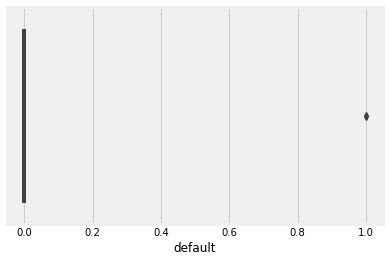

In [67]:
sns.boxplot(x=X_train['default'])

In [68]:
X_train['default'].value_counts()

0    25878
1        2
Name: default, dtype: int64

Dari informasi diatas dapat disimpulkan bahwa keberadaan outlier dengan presentase 100% pada fitur **default** merupakan hal yang wajar karena sebagian besar data berlabel 0 (no).

######loan outliers = 100.00%

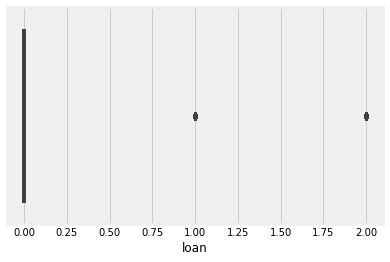

In [69]:
sns.boxplot(x=X_train['loan'])

In [70]:
X_train['loan'].value_counts()

0    21347
2     3927
1      606
Name: loan, dtype: int64

Dari informasi diatas dapat disimpulkan bahwa keberadaan outlier dengan presentase 100% pada fitur **loan** merupakan hal yang wajar karena sebagian besar data berlabel 0 (no).

######previous outliers = 100.00%

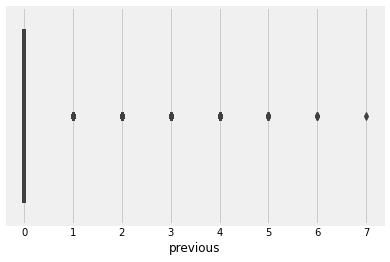

In [71]:
sns.boxplot(x=X_train['previous'])

In [72]:
X_train['previous'].value_counts()

0    21871
1     3208
2      553
3      174
4       55
5       13
6        5
7        1
Name: previous, dtype: int64

Dari informasi diatas dapat disimpulkan bahwa keberadaan outlier dengan presentase 100% pada fitur **previuos** merupakan hal yang wajar karena sebagian besar data berlabel 0 (no).

######pdays outliers = 100.00%

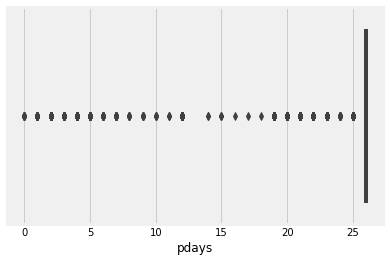

In [73]:
sns.boxplot(x=X_train['pdays'])

999 berarti klien tidak pernah dihubungi sebelumnya

In [74]:
X_train['pdays'].value_counts()

26    24720
19      342
22      310
20       89
25       53
23       45
4        45
2        43
12       40
21       34
5        28
3        24
1        21
7        17
6        16
24       12
0        10
9         8
8         7
10        5
11        3
15        3
14        2
18        1
17        1
16        1
Name: pdays, dtype: int64

Terlihat sebagian besar prospek merupakan prospek yang baru pertama kali dihubungi, keberadaan outlier pada pdays disebabkan oleh 999. Berdasarkan analisis saya memutuskan untuk tidak melakukan treatment apapun karena keberadaan outlier pada fitur pdays adalah hal yang wajar.

######poutcome outliers = 100.00%

In [75]:
X_train['poutcome'].value_counts()

1    21871
0     2959
2     1050
Name: poutcome, dtype: int64

*   failure (0)
*   nonexistent (1)
*   success (2)



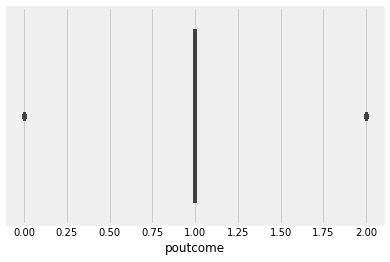

In [76]:
sns.boxplot(x=X_train['poutcome'])

Keberadaan outlier pada fitur **poutcome** merupakan sesuatu yang wajar. Dikarenakan sebagian besar data pada fitur **poutcome** berlabel nonexistent (1)

#####CAPPING X_TRAIN

In [ ]:
'''
Saya melakukan capping untuk menghandle variabel yang mengandung outlier pada
X_train dengan presentase outlier diatas 3% - 25%

Column duration outliers = 7.18%
Column campaign outliers = 7.78%

'''

!pip install feature-engine
from feature_engine.outliers import Winsorizer

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['duration', 'campaign'])

windsoriser.fit(X_train)

X_train_t = windsoriser.transform(X_train)

     |████████████████████████████████| 180 kB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 62.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'duration': -223.0, 'campaign': -2.0}
Right Tail Caps :  {'duration': 649.0, 'campaign': 6.0}


In [ ]:
print('X_train Numerik Fitur Dataframe - Before Capping')
print(X_train.describe())
print('')
print('X_train Numerik Fitur Dataframe - After Capping')
print(X_train_t.describe())

X_train Numerik Fitur Dataframe - Before Capping
                age           job  ...     euribor3m   nr.employed
count  25462.000000  25462.000000  ...  25462.000000  25462.000000
mean      39.116802      3.769971  ...      3.450708   5160.136843
std       10.463983      3.641649  ...      1.782007     75.724114
min       17.000000      0.000000  ...      0.634000   4963.600000
25%       31.000000      0.000000  ...      1.313000   5099.100000
50%       37.000000      2.000000  ...      4.856000   5191.000000
75%       46.000000      7.000000  ...      4.961000   5228.100000
max       94.000000     11.000000  ...      5.045000   5228.100000

[8 rows x 20 columns]

X_train Numerik Fitur Dataframe - After Capping
                age           job  ...     euribor3m   nr.employed
count  25462.000000  25462.000000  ...  25462.000000  25462.000000
mean      39.116802      3.769971  ...      3.450708   5160.136843
std       10.463983      3.641649  ...      1.782007     75.724114
min     

In [ ]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Duration - Before Capping


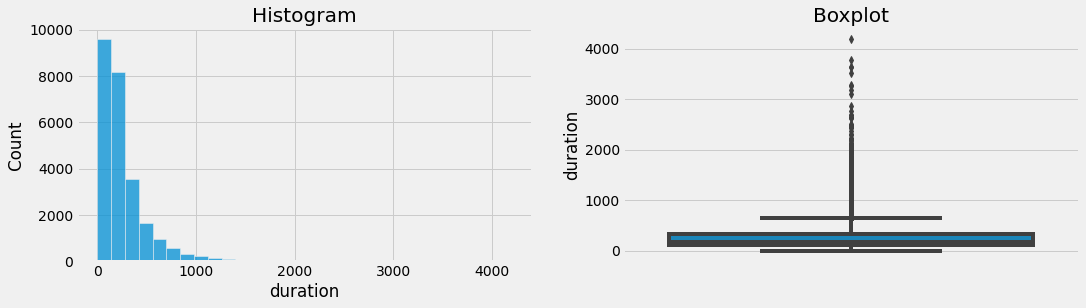

\Duration - After Capping


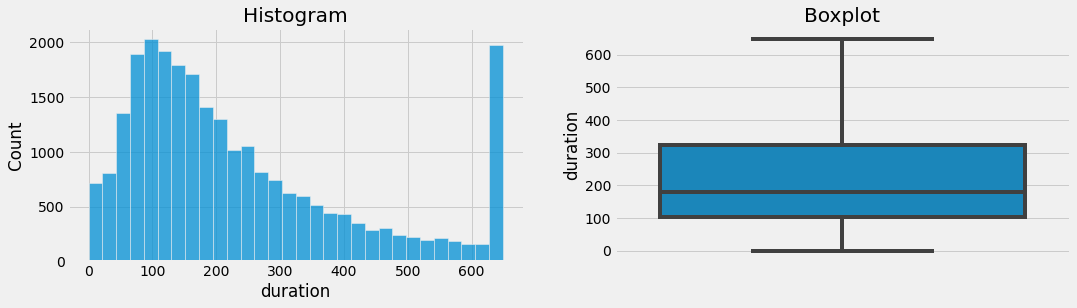

Campaign - Before Capping


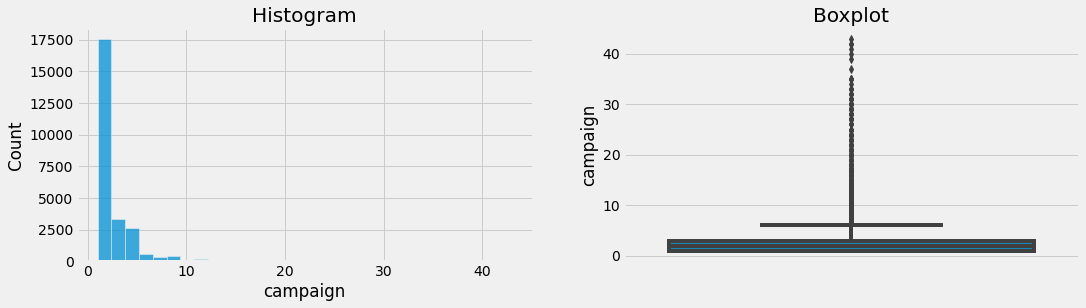

\Campaign - After Capping


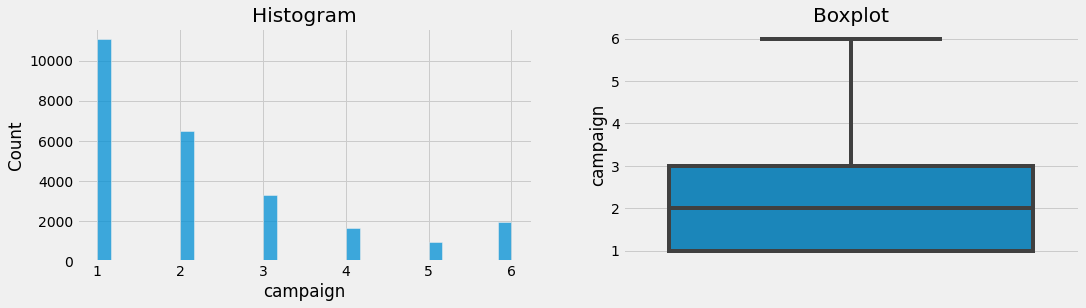

In [ ]:
print('Duration - Before Capping')
diagnostic_plots(X_train, 'duration')
print('\Duration - After Capping')
diagnostic_plots(X_train_t, 'duration')

print('Campaign - Before Capping')
diagnostic_plots(X_train, 'campaign')
print('\Campaign - After Capping')
diagnostic_plots(X_train_t, 'campaign')

#####TRIMMING X_TRAIN

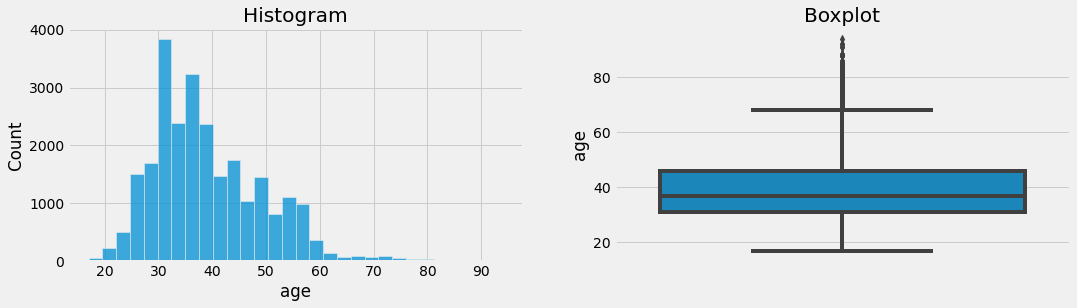

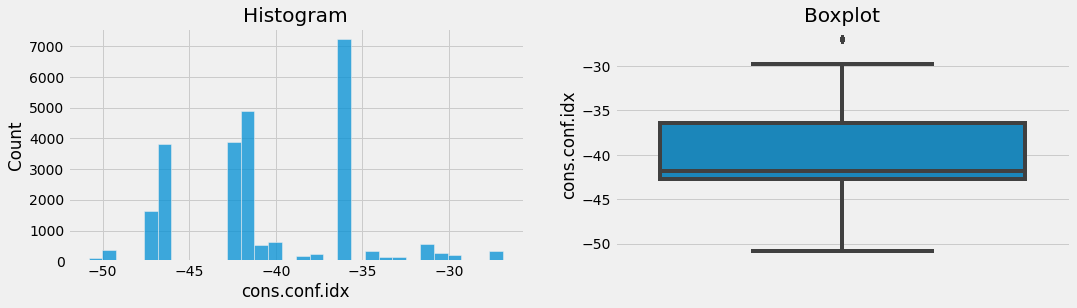

In [ ]:
'''
Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier 
dengan presentase outlier sama dengan dan dibawah 3%

Column age outliers = 1.62%
Column cons.conf.idx outliers = 1.24%

'''

diagnostic_plots(X_train, 'age')
diagnostic_plots(X_train, 'cons.conf.idx')

In [ ]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Limits for `duration`
duration_upper_limit, duration_lower_limit = find_skewed_boundaries(X_train, 'duration', 1.5)
duration_upper_limit, duration_lower_limit

# Limits for `cons.conf.idx`
consconfidx_upper_limit, consconfidx_lower_limit = find_skewed_boundaries(X_train, 'cons.conf.idx', 1.5)
consconfidx_upper_limit, consconfidx_lower_limit

print('duration_upper_limit : ', duration_upper_limit)
print('duration_lower_limit : ', duration_lower_limit, '\n')
print('consconfidx_upper_limit : ', consconfidx_upper_limit)
print('consconfidx_lower_limit : ', consconfidx_lower_limit)

duration_upper_limit :  649.0
duration_lower_limit :  -223.0 

consconfidx_upper_limit :  -26.949999999999992
consconfidx_lower_limit :  -52.150000000000006


In [ ]:
index_drop_train = X_train.index[X_train['duration'] > duration_upper_limit]
index_drop_train.nunique()

1820

In [ ]:
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())
print(X_train.shape)
print(y_train.shape)

(23642, 20)
(23642,)


In [ ]:
index_drop_train = X_train.index[X_train['cons.conf.idx'] > consconfidx_upper_limit]
index_drop_train.nunique()

308

In [ ]:
X_train = X_train.drop(index_drop_train.tolist())
y_train = y_train.drop(index_drop_train.tolist())
print(X_train.shape)
print(y_train.shape)

(23334, 20)
(23334,)




*   Setelah ditrim jumlah X_train sebesar 23334 data dengan 20 variabel.
*   Jumlah y_train sebesar 23334 data



####ANALYSIS OUTLIER X_TEST DENGAN PRESENTASE 100%

In [ ]:
'''
Menampilkan presentasi outlier pada X_test

'''
 
for k, v in X_test.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(X_test)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column age outliers = 1.60%
Column job outliers = 0.00%
Column marital outliers = 0.00%
Column education outliers = 0.00%
Column default outliers = 100.00%
Column housing outliers = 0.00%
Column loan outliers = 100.00%
Column contact outliers = 0.00%
Column month outliers = 0.00%
Column day_of_week outliers = 0.00%
Column duration outliers = 7.07%
Column campaign outliers = 7.78%
Column pdays outliers = 100.00%
Column previous outliers = 100.00%
Column poutcome outliers = 100.00%
Column emp.var.rate outliers = 0.00%
Column cons.price.idx outliers = 0.00%
Column cons.conf.idx outliers = 1.49%
Column euribor3m outliers = 0.00%
Column nr.employed outliers = 0.00%


######default outliers = 100.00%

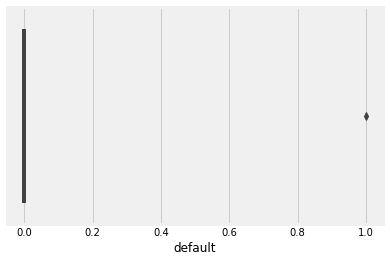

In [77]:
sns.boxplot(x=X_test['default'])

In [78]:
X_test['default'].value_counts()

0    6470
1       1
Name: default, dtype: int64

Dari informasi diatas dapat disimpulkan bahwa keberadaan outlier dengan presentase 100% pada fitur **default** merupakan hal yang wajar karena sebagian besar data berlabel 0 (no).

######loan outliers = 100.00%

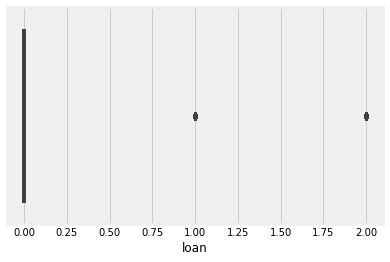

In [79]:
sns.boxplot(x=X_test['loan'])

In [80]:
X_test['loan'].value_counts()

0    5315
2    1001
1     155
Name: loan, dtype: int64

Dari informasi diatas dapat disimpulkan bahwa keberadaan outlier dengan presentase 100% pada fitur **loan** merupakan hal yang wajar karena sebagian besar data berlabel 0 (no).

######previous outliers = 100.00%

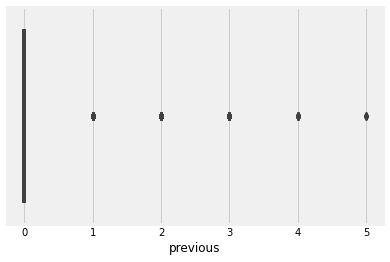

In [81]:
sns.boxplot(x=X_test['previous'])

In [82]:
X_test['previous'].value_counts()

0    5478
1     797
2     144
3      34
4      13
5       5
Name: previous, dtype: int64

Dari informasi diatas dapat disimpulkan bahwa keberadaan outlier dengan presentase 100% pada fitur **previous** merupakan hal yang wajar karena sebagian besar data berlabel 0 (no).

######pdays outliers = 100.00%

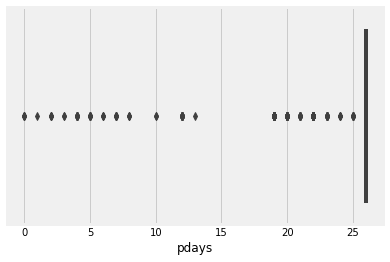

In [83]:
sns.boxplot(x=X_test['pdays'])

999 berarti klien tidak pernah dihubungi sebelumnya

In [84]:
X_test['pdays'].value_counts()

26    6203
22      77
19      76
20      23
12      15
23      12
4       10
21      10
25       8
5        7
7        6
2        4
24       4
0        4
6        3
8        3
10       2
3        2
13       1
1        1
Name: pdays, dtype: int64

Terlihat sebagian besar prospek merupakan prospek yang baru pertama kali dihubungi, keberadaan outlier pada pdays disebabkan oleh 999. Berdasarkan analisis saya memutuskan untuk tidak melakukan treatment apapun karena keberadaan outlier pada fitur pdays adalah hal yang wajar.

#####CAPPING X_TEST

In [ ]:
'''
Saya melakukan capping untuk menghandle variabel yang mengandung outlier pada
X_train dengan presentase outlier diatas 3% - 25%

Column duration outliers = 7.07%
Column campaign outliers = 7.78%

'''

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['duration', 'campaign'])

windsoriser.fit(X_test)

X_test_t = windsoriser.transform(X_test)

In [ ]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'duration': -225.5, 'campaign': -2.0}
Right Tail Caps :  {'duration': 650.5, 'campaign': 6.0}


In [ ]:
print('X_test Numerik Fitur Dataframe - Before Capping')
print(X_test.describe())
print('')
print('X_test Numerik Fitur Dataframe - After Capping')
print(X_test_t.describe())

X_test Numerik Fitur Dataframe - Before Capping
               age          job  ...    euribor3m  nr.employed
count  6366.000000  6366.000000  ...  6366.000000  6366.000000
mean     39.271128     3.808357  ...     3.436770  5159.711059
std      10.541222     3.630070  ...     1.788542    75.843611
min      17.000000     0.000000  ...     0.634000  4963.600000
25%      31.000000     0.000000  ...     1.313000  5099.100000
50%      37.000000     3.000000  ...     4.856000  5191.000000
75%      46.000000     7.000000  ...     4.961000  5228.100000
max      95.000000    11.000000  ...     5.000000  5228.100000

[8 rows x 20 columns]

X_test Numerik Fitur Dataframe - After Capping
               age          job  ...    euribor3m  nr.employed
count  6366.000000  6366.000000  ...  6366.000000  6366.000000
mean     39.271128     3.808357  ...     3.436770  5159.711059
std      10.541222     3.630070  ...     1.788542    75.843611
min      17.000000     0.000000  ...     0.634000  4963.600000

Duration - Before Capping


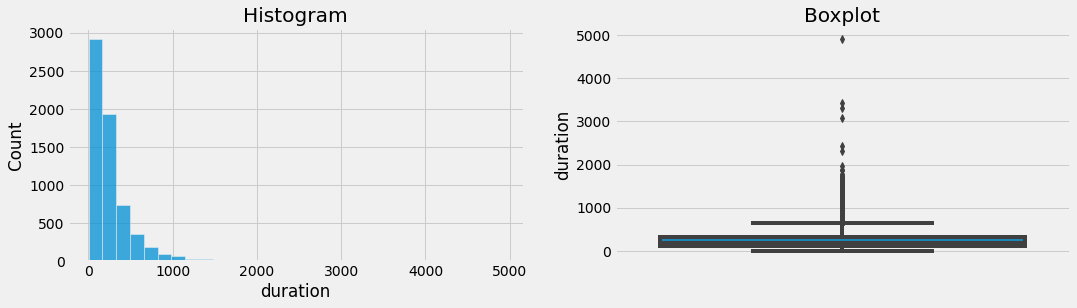

\Duration - After Capping


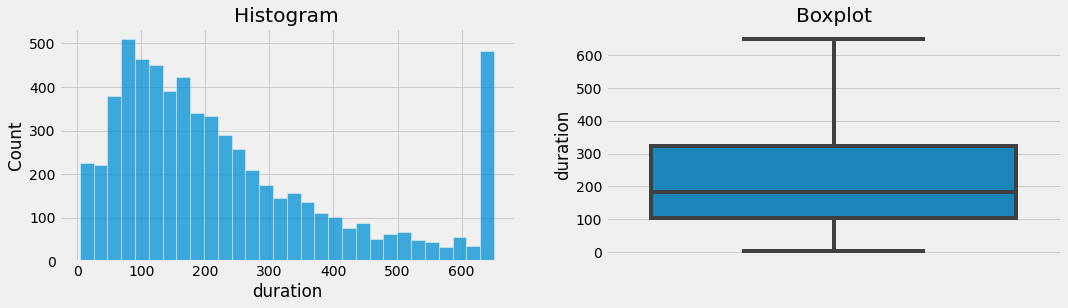

Campaign - Before Capping


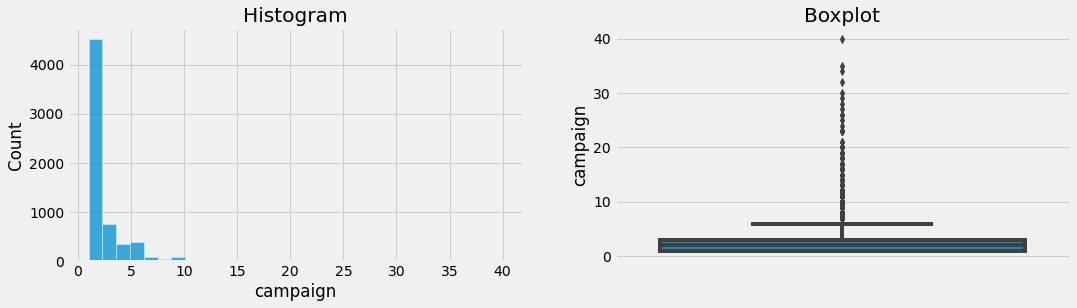

\Campaign - After Capping


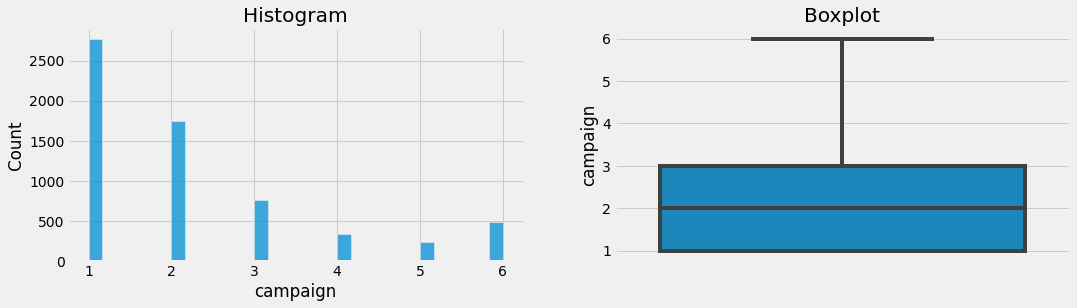

In [ ]:
print('Duration - Before Capping')
diagnostic_plots(X_test, 'duration')
print('\Duration - After Capping')
diagnostic_plots(X_test_t, 'duration')

print('Campaign - Before Capping')
diagnostic_plots(X_test, 'campaign')
print('\Campaign - After Capping')
diagnostic_plots(X_test_t, 'campaign')

#####TRIMMING X_TEST

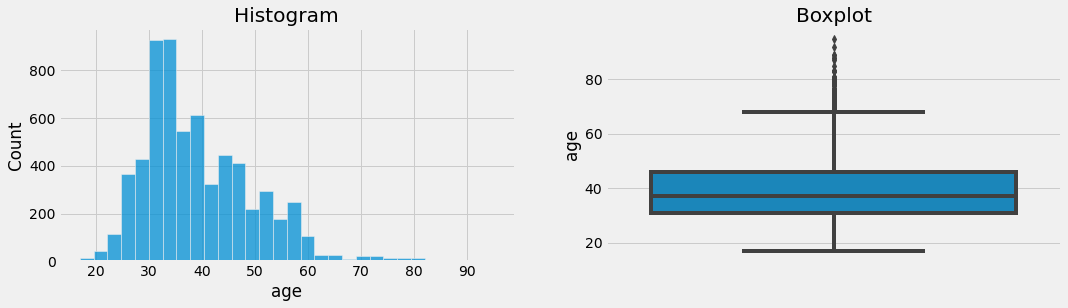

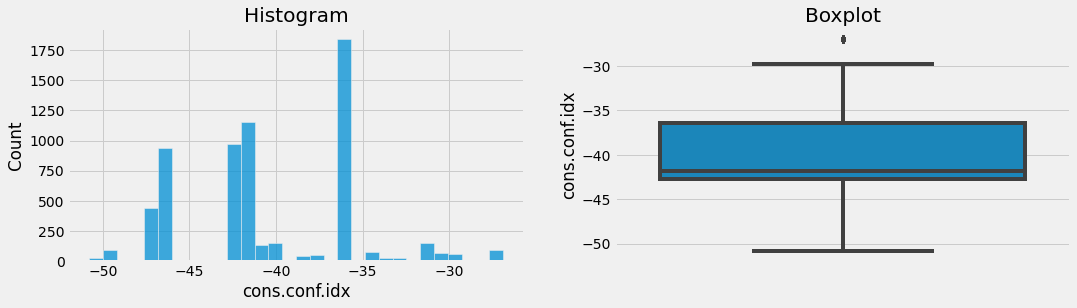

In [ ]:
'''
Saya menggunakan trimming untuk menghandle variabel yang mengandung outlier 
dengan presentase outlier sama dengan dan dibawah 3%

Column age outliers = 1.30%
Column cons.conf.idx outliers = 1.53%

'''

diagnostic_plots(X_test, 'age')
diagnostic_plots(X_test, 'cons.conf.idx')

In [ ]:
# Limits for `duration`
duration_upper_limit, duration_lower_limit = find_skewed_boundaries(X_test, 'duration', 1.5)
duration_upper_limit, duration_lower_limit

# Limits for `cons.conf.idx`
consconfidx_upper_limit, consconfidx_lower_limit = find_skewed_boundaries(X_test, 'cons.conf.idx', 1.5)
consconfidx_upper_limit, consconfidx_lower_limit


print('duration_upper_limit : ', duration_upper_limit)
print('duration_lower_limit : ', duration_lower_limit, '\n')
print('consconfidx_upper_limit : ', consconfidx_upper_limit)
print('consconfidx_lower_limit : ', consconfidx_lower_limit)

duration_upper_limit :  650.5
duration_lower_limit :  -225.5 

consconfidx_upper_limit :  -26.949999999999992
consconfidx_lower_limit :  -52.150000000000006


In [ ]:
index_drop_test = X_test.index[X_test['duration'] > duration_upper_limit]
index_drop_test.nunique()

450

In [ ]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(5916, 20)
(5916,)


In [ ]:
index_drop_test = X_test.index[X_test['cons.conf.idx'] > duration_upper_limit]
index_drop_test.nunique()

0

In [ ]:
X_test = X_test.drop(index_drop_test.tolist())
y_test = y_test.drop(index_drop_test.tolist())
print(X_test.shape)
print(y_test.shape)

(5916, 20)
(5916,)


*   Setelah ditrim jumlah X_test sebesar 5916 data dengan 20 variabel.
*   Jumlah y_train sebesar 5916 data



###6.6 FEATURE SELECTION 

**Dari hasil matriks korelasi terlihat bahwa duration, nr.employed, euriborn3m, emp.var.rate dan previous merupakan fitur yang memiliki nilai korelasi tertinggi terhadap variabel target (Y) dibandingkan variabel lainnya. Sehingga saya memutuskan untuk menggunakan 5 fitur numerik ini karena memiliki nilai korelasi tertinggi terhadap target.**

In [ ]:
num_feature_train = X_train[num_cols].loc[:, ['duration', 'nr.employed', 'euribor3m', 'emp.var.rate', 'previous']]
num_feature_test = X_test[num_cols].loc[:, ['duration', 'nr.employed', 'euribor3m', 'emp.var.rate', 'previous']]

X_train_num = num_feature_train
X_test_num = num_feature_test

**Saya memutuskan untuk menggunakan empat fitur pada fitur kategorik, yaitu job, marital, education dan month. Dikarenakan berdasarkan hasil analisis pada EDA terlihat bahwa Prospek yang sudah menikah telah membuat setoran tinggi dan diikuti oleh single. Ada banyak deposit yang dilakukan selama bulan Mei karena ini adalah awal dari periode bank. Prospek yang bekerja di posisi administrasi membuat deposit paling tinggi diikuti oleh teknisi dan karyawan kerah biru. Prospek yang memiliki setidaknya gelar universitas telah melakukan setoran diikuti oleh sekolah menengah.**

Berdasarkan intuisi saya, nilai yang dikandung dalam empat fitur ini berpengaruh penting terhadap prediksi yang akan dilakukan kedapa target (y).

In [ ]:
cat_feature_train = X_train[cat_cols].loc[:, ['job', 'marital', 'education', 'month']]
cat_feature_test = X_test[cat_cols].loc[:, ['job', 'marital', 'education', 'month']]

X_train_cat = cat_feature_train
X_test_cat = cat_feature_test

In [ ]:
processed_data_train = np.concatenate([X_train_num, X_train_cat], axis=1)
X_train = processed_data_train
X_train

array([[1.6000e+01, 5.2281e+03, 4.9620e+00, ..., 1.0000e+00, 1.0000e+00,
        3.0000e+00],
       [2.4000e+02, 5.0762e+03, 8.3400e-01, ..., 1.0000e+00, 5.0000e+00,
        1.0000e+00],
       [2.0600e+02, 5.1910e+03, 4.8570e+00, ..., 1.0000e+00, 6.0000e+00,
        6.0000e+00],
       ...,
       [2.2700e+02, 5.0762e+03, 1.2060e+00, ..., 2.0000e+00, 5.0000e+00,
        4.0000e+00],
       [4.0400e+02, 5.2281e+03, 4.9630e+00, ..., 1.0000e+00, 7.0000e+00,
        3.0000e+00],
       [9.9000e+01, 5.0991e+03, 1.2660e+00, ..., 1.0000e+00, 5.0000e+00,
        6.0000e+00]])

In [ ]:
processed_data_test = np.concatenate([X_test_num, X_test_cat], axis=1)
X_test = processed_data_test
X_test

array([[2.1600e+02, 5.0991e+03, 1.4050e+00, ..., 1.0000e+00, 2.0000e+00,
        0.0000e+00],
       [4.4200e+02, 5.2281e+03, 4.9620e+00, ..., 1.0000e+00, 3.0000e+00,
        3.0000e+00],
       [5.2900e+02, 5.1910e+03, 4.8570e+00, ..., 1.0000e+00, 2.0000e+00,
        6.0000e+00],
       ...,
       [1.4400e+02, 5.2281e+03, 4.9610e+00, ..., 1.0000e+00, 3.0000e+00,
        3.0000e+00],
       [9.5000e+01, 5.1958e+03, 4.1200e+00, ..., 0.0000e+00, 6.0000e+00,
        7.0000e+00],
       [3.9700e+02, 5.2281e+03, 4.8640e+00, ..., 1.0000e+00, 2.0000e+00,
        4.0000e+00]])

#7. PIPELINE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

pipe_log = Pipeline([
('scaler', StandardScaler()),
('classifier', LogisticRegression(random_state=28))])

pipe_svm = Pipeline([
('scaler', StandardScaler()),
('classifier', SVC())])

pipe_dt = Pipeline([
('scaler', StandardScaler()),
('classifier', DecisionTreeClassifier(max_depth= 2,random_state=28))])

pipe_rf = Pipeline([
('scaler', StandardScaler()),
('classifier', RandomForestClassifier())])

pipe_knn = Pipeline([
('scaler', StandardScaler()),
('classifier', KNeighborsClassifier(n_neighbors=2))])

pipe_xgb = Pipeline([
('scaler', StandardScaler()),
('classifier', XGBClassifier(random_state=28))])

#8. MODEL DAN EVALUASI

###8.1 LOGISTIC REGRESSION

In [ ]:
pipe_log.fit(X_train, y_train)
print('Training Score: ',round(pipe_log.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_log.score(X_test, y_test),4))

Training Score:  0.9198
Testing Score:  0.9106


Setelah di train dan ditesting model logistic regression maka dihasilkan akurasi untuk training sebesar 91.98% dan testing sebesar 91.06%

In [ ]:
y_logreg_pred = pipe_log.predict(X_test)

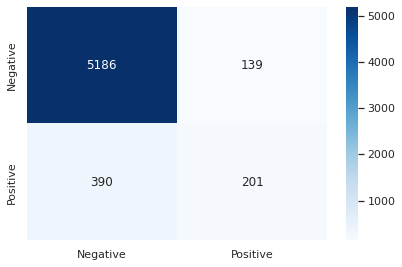

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

cf_matrix_logreg = confusion_matrix(y_test, y_logreg_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_logreg, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

Pada hasil confussion matrix model Logistic Regression terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5186 dan 139 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 201 dan 309 terprediksi salah sebagai 0 (No)

###8.2 SVM

In [ ]:
pipe_svm.fit(X_train, y_train)
print('Training Score: ',round(pipe_svm.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_svm.score(X_test, y_test),4))

Training Score:  0.9268
Testing Score:  0.9184


Setelah di train dan ditesting model SVM maka dihasilkan akurasi untuk training sebesar 92.68% dan testing sebesar 91.84%

In [ ]:
y_svm_pred = pipe_svm.predict(X_test)

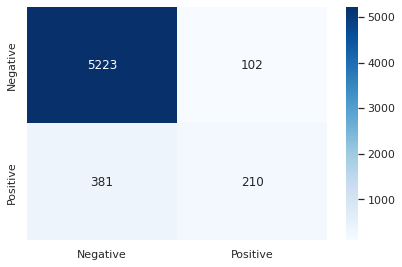

In [ ]:
cf_matrix_svm = confusion_matrix(y_test, y_svm_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_svm, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

Pada hasil confussion matrix model SVM terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5223 dan 102 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 210 dan 381 terprediksi salah sebagai 0 (No)

###8.3 DECISSION TREE

In [ ]:
pipe_dt.fit(X_train, y_train)
print('Training Score: ',round(pipe_dt.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_dt.score(X_test, y_test),4))

Training Score:  0.9223
Testing Score:  0.9185


Setelah di train dan ditesting model decision tree maka dihasilkan akurasi untuk training sebesar 92.23% dan testing sebesar 91.85%

In [ ]:
y_dt_pred = pipe_dt.predict(X_test)

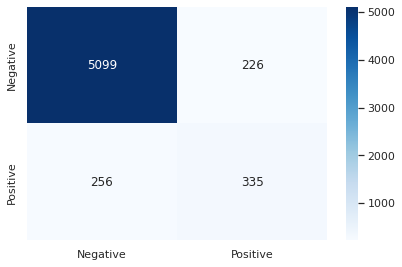

In [ ]:
cf_matrix_dt = confusion_matrix(y_test, y_dt_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_dt, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

Pada hasil confussion matrix model decision tree terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5099 dan 226 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 335 dan 256 terprediksi salah sebagai 0 (No)

###8.4 RANDOM FOREST

In [ ]:
pipe_rf.fit(X_train, y_train)
print('Training Score: ',round(pipe_rf.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_rf.score(X_test, y_test),4))

Training Score:  0.9997
Testing Score:  0.9192


Setelah di train dan ditesting model random forest maka dihasilkan akurasi untuk training sebesar 99.97% dan testing sebesar 91.90%

In [ ]:
y_rf_pred = pipe_rf.predict(X_test)

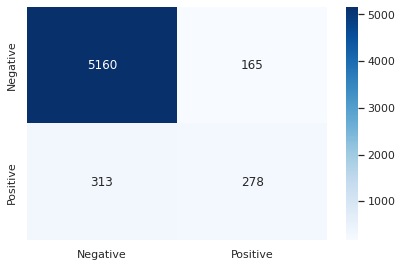

In [ ]:
cf_matrix_rf = confusion_matrix(y_test, y_rf_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_rf, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

Pada hasil confussion matrix model random forest terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5158 dan 167 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 279 dan 312 terprediksi salah sebagai 0 (No)

###8.5 KNN

In [ ]:
pipe_knn.fit(X_train, y_train)
print('Training Score: ',round(pipe_knn.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test, y_test),4))

Training Score:  0.9486
Testing Score:  0.9043


Setelah di train dan ditesting model KNN maka dihasilkan akurasi untuk training sebesar 94.86% dan testing sebesar 90.43%

In [ ]:
y_knn_pred = pipe_knn.predict(X_test)

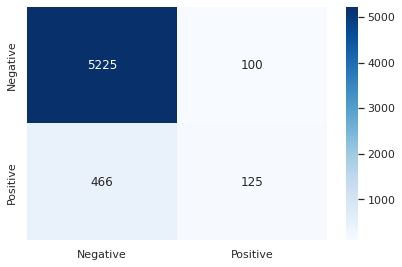

In [ ]:
cf_matrix_knn = confusion_matrix(y_test, y_knn_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_knn, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

Pada hasil confussion matrix model KNN terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5225 dan 100 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 125 dan 466 terprediksi salah sebagai 0 (No)

###8.6 XGBOOST

In [ ]:
pipe_xgb.fit(X_train, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test, y_test),4))

Training Score:  0.9303
Testing Score:  0.9258


Setelah di train dan ditesting model XGBoost maka dihasilkan akurasi untuk training sebesar 93.03% dan testing sebesar 92.58%

In [ ]:
y_xgb_pred = pipe_xgb.predict(X_test)

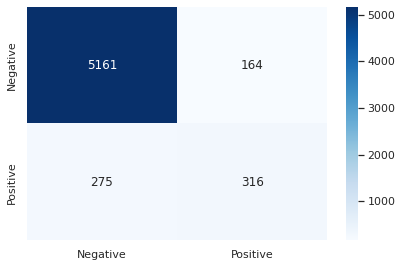

In [ ]:
cf_matrix_xgb = confusion_matrix(y_test, y_xgb_pred)
sns.set(rc={'figure.figsize':(6,4)})

ax = sns.heatmap(cf_matrix_xgb, annot = True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negative", "Positive"])
ax.set_yticklabels(["Negative", "Positive"])
plt.show()

Pada hasil confussion matrix model XGBoost terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5161 dan 164 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 316 dan 275 terprediksi salah sebagai 0 (No)

#9. PARAMETER TUNNING

In [ ]:
#Logistic regression
param_log = {'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__penalty': ['l1', 'l2','elasticnet', 'none'],
             'classifier__C' : [0.001, 0.01, 0.1, 1],
             'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }

#SVM
param_svm = {'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
             'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
             }

#Decision Tree
param_dt = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__criterion':['gini','entropy'],
            'classifier__max_depth':np.arange(2,8),
            'classifier__min_samples_split':np.arange(2,8),
            'classifier__min_samples_leaf':np.arange(2,8),
            'classifier__max_features':['auto','sqrt','log2']
            }

#Random Forest
param_rf = {'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__max_depth': [10, 50, 100],
            'classifier__max_features': [2, 3],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__min_samples_split': [8, 10, 12],
            'classifier__n_estimators': [100, 200, 300]
            }

#KNN
param_knn = {'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__n_neighbors': (1, 10, 1),
             'classifier__leaf_size': (20, 40, 1),
             'classifier__p': (1, 2),
             'classifier__weights': ('uniform', 'distance'),
             'classifier__metric': ('minkowski', 'chebyshev')
             }

#XBoost
param_xgb = {'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__learning_rate':[0.1,0.01,0.001],
             'classifier__n_estimators':np.arange(100,501,100),
             'classifier__max_depth':np.arange(2,8),
             }

#10. GRID SEARCH DAN CROSS VALIDATION

###10.1 LOGISTIC REGRESSION CLASSIFIER



             'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__penalty': ['l1', 'l2','elasticnet', 'none'],
             'classifier__C' : [0.001, 0.01, 0.1, 1],
             'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_log = GridSearchCV(pipe_log, param_log, cv=5).fit(X_train, y_train)

Model Logistic Regression Classifier di train dengan Grid Search Cross Validation dengan jumlah fold k = 5 selama 1 menit 3 detik

In [ ]:
print('Training set score: ' + str(grid_log.score(X_train, y_train)))
print('Test set score: ' + str(grid_log.score(X_test, y_test)))

Training set score: 0.9199022885060427
Test set score: 0.9107505070993914


Setelah di tuning model logistic regression maka dihasilkan akurasi untuk training sebesar 91.99% dan testing sebesar 91.07%

In [ ]:
# Access the best set of parameters
best_params_log = grid_log.best_params_
print(best_params_log)

# simpan optimum model
best_pipe_log = grid_log.best_estimator_
print(best_pipe_log)
 
result_df_log = pd.DataFrame.from_dict(grid_log.cv_results_, orient='columns')
print(result_df_log.columns)

{'classifier__C': 0.001, 'classifier__penalty': 'none', 'classifier__solver': 'newton-cg', 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.001, penalty='none', random_state=28,
                                    solver='newton-cg'))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__penalty',
       'param_classifier__solver', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


*   classifier__C terbaik untuk digunakan dalam kasus ini adalah sebesar 0.001
*   classifier__penalty terbaik untuk digunakan dalam kasus ini adalah none
*   classifier__solver terbaik untuk digunakan dalam kasus ini adalah newton-cg
*   scaler terbaik untuk digunakan dalam kasus ini adalah sebesar StandardScaler





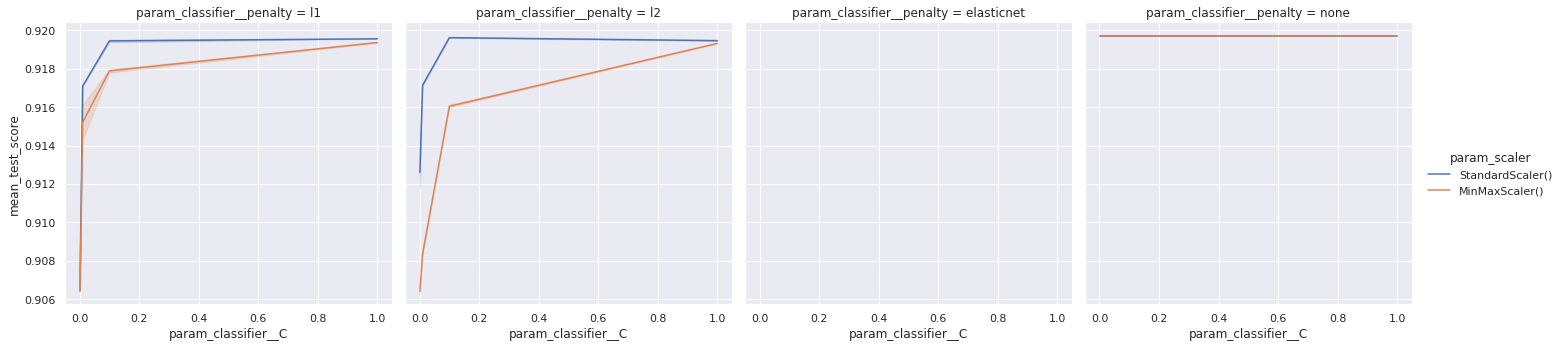

In [ ]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_log,
	kind='line',
	x='param_classifier__C',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__penalty')
plt.show()

Dari gambar diatas dapat kita lihat bahwa penentuan teknik normalisasi pada Logisitic Regression akan mempengaruhi akurasi dari model yang kita buat, berbeda dengan kasus Decision Tree Classifier, Random Forest Classifier dan XGBoost Classifier yang memang teknik normalisasi tidak terlalu berpengaruh untuk algoritma tersebut.

Selain teknik normalisasi nilai C dan penalty juga akan berpengaruh terhadap akurasi pada model Logistic Regression.

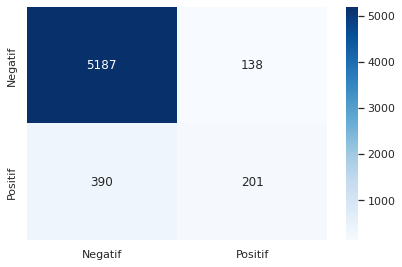

In [ ]:
cf_matrix_log = confusion_matrix(y_test, best_pipe_log.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_log, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

Pada hasil confussion matrix model Logistic Regression terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5187 dan 138 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 201 dan 309 terprediksi salah sebagai 0 (No)

In [ ]:
print(classification_report(y_test, best_pipe_log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5325
           1       0.59      0.34      0.43       591

    accuracy                           0.91      5916
   macro avg       0.76      0.66      0.69      5916
weighted avg       0.90      0.91      0.90      5916



Pada classification report model Logistic Regression terlihat bahwa:
*   Precision untuk kelas 0 sebesar 93%, untuk kelas 1 sebesar 59%
*   Recall untuk kelas 0 sebesar 97%, untuk kelas 1 sebesar 34%
*   F1 score untuk kelas 0 sebesar 95%, untuk kelas 1 sebesar 43%

###10.2 SVM CLASSIFIER



             'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
             'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
grid_svm = GridSearchCV(pipe_svm, param_svm, cv=5).fit(X_train, y_train)

Model SVM Classifier di train dengan Grid Search Cross Validation dengan jumlah fold k = 5 selama 1 jam 24 menit 6 detik

In [ ]:
print('Training set score: ' + str(grid_svm.score(X_train, y_train)))
print('Test set score: ' + str(grid_svm.score(X_test, y_test)))

Training set score: 0.928473472186509
Test set score: 0.9212305611899932


Setelah di tuning model SVM maka dihasilkan akurasi untuk training sebesar 92.84% dan testing sebesar 92.12%

In [ ]:
# Access the best set of parameters
best_params_svm = grid_svm.best_params_
print(best_params_svm)

# simpan optimum model
best_pipe_svm = grid_svm.best_estimator_
print(best_pipe_svm)
 
result_df_svm = pd.DataFrame.from_dict(grid_svm.cv_results_, orient='columns')
print(result_df_svm.columns)

{'classifier__C': 10, 'classifier__gamma': 1, 'scaler': MinMaxScaler()}
Pipeline(steps=[('scaler', MinMaxScaler()), ('classifier', SVC(C=10, gamma=1))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__gamma', 'param_scaler',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


*   classifier__C terbaik untuk digunakan dalam kasus ini adalah sebesar 10
*   classifier__gamma terbaik untuk digunakan dalam kasus ini adalah sebesar 1
*   scaler terbaik untuk digunakan dalam kasus ini adalah sebesar MinMaxScaler

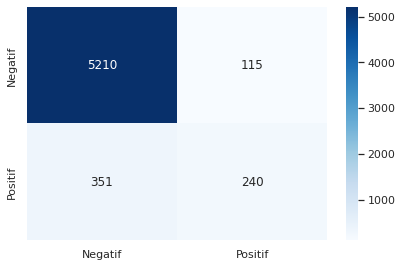

In [ ]:
# Cek confusion matrix
cf_matrix_svm = confusion_matrix(y_test, best_pipe_svm.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_svm, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

Pada hasil confussion matrix model Logistic Regression terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5210 dan 115 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 240 dan 315 terprediksi salah sebagai 0 (No)

In [ ]:
print(classification_report(y_test, best_pipe_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5325
           1       0.68      0.41      0.51       591

    accuracy                           0.92      5916
   macro avg       0.81      0.69      0.73      5916
weighted avg       0.91      0.92      0.91      5916



Pada classification report model Logistic Regression terlihat bahwa:
*   Precision untuk kelas 0 sebesar 94%, untuk kelas 1 sebesar 68%
*   Recall untuk kelas 0 sebesar 98%, untuk kelas 1 sebesar 41%
*   F1 score untuk kelas 0 sebesar 96%, untuk kelas 1 sebesar 51%

###10.3 DECISION TREE CLASSIFIER



            'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__criterion':['gini','entropy'],
            'classifier__max_depth':np.arange(2,8),
            'classifier__min_samples_split':np.arange(2,8),
            'classifier__min_samples_leaf':np.arange(2,8),
            'classifier__max_features':['auto','sqrt','log2']

In [ ]:
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5).fit(X_train, y_train)

Model Decision Tree Classifier di train dengan Grid Search Cross Validation dengan jumlah fold k = 5 selama 3 menit 37 detik

In [ ]:
print('Training set score: ' + str(grid_dt.score(X_train, y_train)))
print('Test set score: ' + str(grid_dt.score(X_test, y_test)))

Training set score: 0.9272306505528414
Test set score: 0.9207234617985125


Setelah di tuning model decision tree maka dihasilkan akurasi untuk training sebesar 92.72% dan testing sebesar 92.07%

In [ ]:
# Access the best set of parameters
best_params_dt = grid_dt.best_params_
print(best_params_dt)

# simpan optimum model
best_pipe_dt = grid_dt.best_estimator_
print(best_pipe_dt)
 
result_df_dt = pd.DataFrame.from_dict(grid_dt.cv_results_, orient='columns')
print(result_df_dt.columns)

{'classifier__criterion': 'entropy', 'classifier__max_depth': 6, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'scaler': MinMaxScaler()}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features='auto', min_samples_leaf=4,
                                        random_state=28))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__criterion', 'param_classifier__max_depth',
       'param_classifier__max_features', 'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


*   classifier__criterion terbaik untuk digunakan dalam kasus ini adalah entropy
*   classifier__max_depth terbaik untuk digunakan dalam kasus ini sebesar 6
*   classifier__max_features terbaik untuk digunakan dalam kasus ini adalah auto
*   classifier__min_samples_leaf terbaik untuk digunakan dalam kasus ini sebesar 4
*   classifier__min_sample_split terbaik untuk digunakan dalam kasus ini adalah sebesar 2
*   scaler terbaik untuk digunakan dalam kasus ini adalah sebesar MinMaxScaler

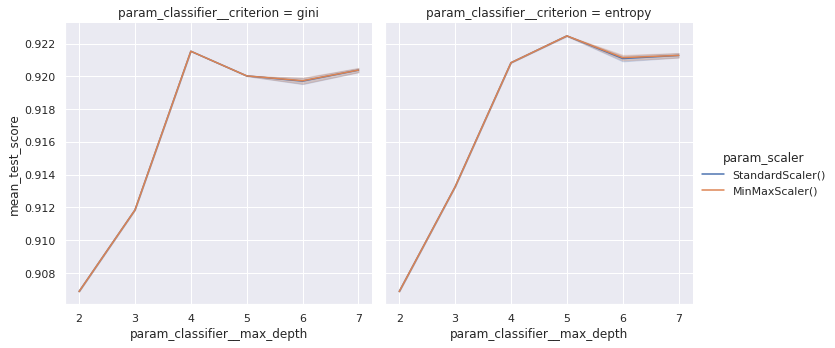

In [ ]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_dt,
	kind='line',
	x='param_classifier__max_depth',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__criterion')
plt.show()

Dari gambar diatas dapat kita lihat bahwa penentuai *max_depth* dan *criterion* pada Decision Tree Classifier sangat mempengaruhi model yang dibuat, namun teknik normalisasi antara StandarScaler dan MinMaxScaler tidak begitu berpengaruh pada algoritma yang non-linear seperti Decision Tree. 

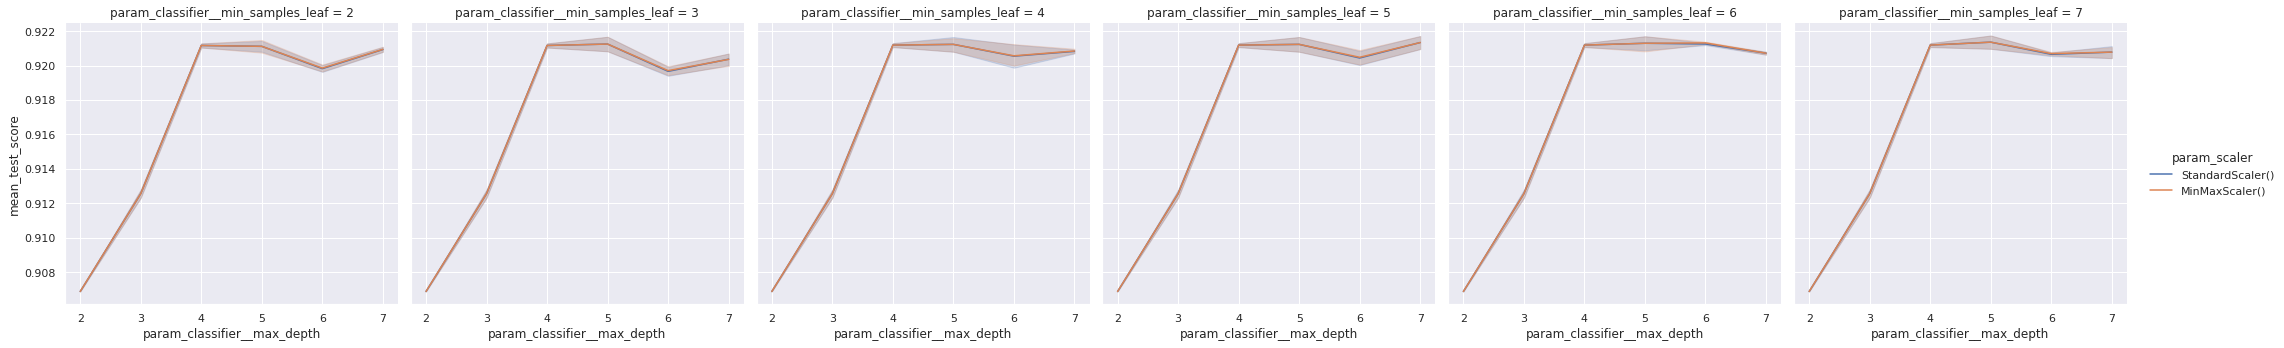

In [ ]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_dt,
	kind='line',
	x='param_classifier__max_depth',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__min_samples_leaf')
plt.show()

Dari gambar diatas dapat kita lihat bahwa selain *max_depth*, nilai *min_samples_leaf* pada Decision Tree Classifier sangat mempengaruhi model.

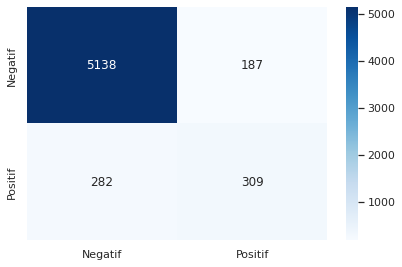

In [ ]:
cf_matrix_dt = confusion_matrix(y_test, best_pipe_dt.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_dt, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

Pada hasil confussion matrix model Logistic Regression terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5138 dan 187 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 309 dan 282 terprediksi salah sebagai 0 (No)

In [ ]:
print(classification_report(y_test, best_pipe_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5325
           1       0.62      0.52      0.57       591

    accuracy                           0.92      5916
   macro avg       0.79      0.74      0.76      5916
weighted avg       0.92      0.92      0.92      5916



Pada classification report model Decision Tree Classifier terlihat bahwa:
*   Precision untuk kelas 0 sebesar 95%, untuk kelas 1 sebesar 62%
*   Recall untuk kelas 0 sebesar 96%, untuk kelas 1 sebesar 52%
*   F1 score untuk kelas 0 sebesar 96%, untuk kelas 1 sebesar 57%

###10.4 RANDOM FOREST CLASSIFIER


            
            'scaler': [StandardScaler(),MinMaxScaler()],
            'classifier__max_depth': [10, 50, 100],
            'classifier__max_features': [2, 3],
            'classifier__min_samples_leaf': [3, 4, 5],
            'classifier__min_samples_split': [8, 10, 12],
            'classifier__n_estimators': [100, 200, 300]

In [ ]:
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5).fit(X_train, y_train)

Model Random Forest Classifier di train dengan Grid Search Cross Validation dengan jumlah fold k = 5 selama 1 jam 22 menit 31 detik

In [ ]:
print('Training set score: ' + str(grid_rf.score(X_train, y_train)))
print('Test set score: ' + str(grid_rf.score(X_test, y_test)))

Training set score: 0.9439444587297505
Test set score: 0.9241041244083841


Setelah di tuning model decision tree maka dihasilkan akurasi untuk training sebesar 94.39% dan testing sebesar 92.41%

In [ ]:
# Access the best set of parameters
best_params_rf = grid_rf.best_params_
print(best_params_rf)

# simpan optimum model
best_pipe_rf = grid_rf.best_estimator_
print(best_pipe_rf)
 
result_df_rf = pd.DataFrame.from_dict(grid_rf.cv_results_, orient='columns')
print(result_df_rf.columns)

{'classifier__max_depth': 10, 'classifier__max_features': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 12, 'classifier__n_estimators': 100, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=10, max_features=3,
                                        min_samples_leaf=4,
                                        min_samples_split=12))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__max_features',
       'param_classifier__min_samples_leaf',
       'param_classifier__min_samples_split', 'param_classifier__n_estimators',
       'param_scaler', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


*   classifier__max_dept terbaik untuk digunakan dalam kasus ini adalah sebesar 10
*   classifier__max_features terbaik untuk digunakan dalam kasus ini sebesar 3
*   classifier__min_samples_leaf terbaik untuk digunakan dalam kasus ini adalah 4
*   classifier__min_sample_split terbaik untuk digunakan dalam kasus ini adalah sebesar 12

*   classifier_n_estimator terbaik untuk digunakan dalam kasus ini adalah sebesar 100
*   scaler terbaik untuk digunakan dalam kasus ini adalah sebesar StandardScaler

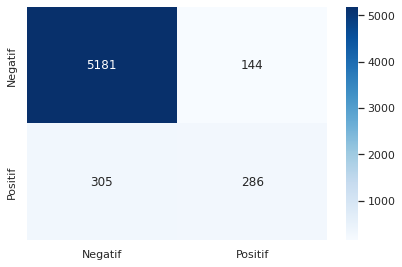

In [ ]:
# Cek confusion matrix
cf_matrix_rf = confusion_matrix(y_test, best_pipe_rf.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_rf, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

Pada hasil confussion matrix model Random Forest terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5181 dan 144 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 286 dan 305 terprediksi salah sebagai 0 (No)

In [ ]:
print(classification_report(y_test, best_pipe_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5325
           1       0.67      0.48      0.56       591

    accuracy                           0.92      5916
   macro avg       0.80      0.73      0.76      5916
weighted avg       0.92      0.92      0.92      5916



Pada classification report model Decision Tree Classifier terlihat bahwa:
*   Precision untuk kelas 0 sebesar 94%, untuk kelas 1 sebesar 67%
*   Recall untuk kelas 0 sebesar 97%, untuk kelas 1 sebesar 48%
*   F1 score untuk kelas 0 sebesar 96%, untuk kelas 1 sebesar 56%

###10.5 KNN CLASSIFIER



             'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__n_neighbors': (1, 10, 1),
             'classifier__leaf_size': (20, 40, 1),
             'classifier__p': (1, 2),
             'classifier__weights': ('uniform', 'distance'),
             'classifier__metric': ('minkowski', 'chebyshev')

In [ ]:
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5).fit(X_train, y_train)

Model KNN Classifier di train dengan Grid Search Cross Validation dengan jumlah fold k = 5 selama 2 menit 5 detik

In [ ]:
print('Training set score: ' + str(grid_knn.score(X_train, y_train)))
print('Test set score: ' + str(grid_knn.score(X_test, y_test)))

Training set score: 0.9291163109625439
Test set score: 0.9163286004056795


Setelah di tuning model knn maka dihasilkan akurasi untuk training sebesar 92.91% dan testing sebesar 91.63%

In [ ]:
# Access the best set of parameters
best_params_knn = grid_knn.best_params_
print(best_params_knn)

# simpan optimum model
best_pipe_knn = grid_knn.best_estimator_
print(best_pipe_knn)
 
result_df_knn = pd.DataFrame.from_dict(grid_knn.cv_results_, orient='columns')
print(result_df_knn.columns)

{'classifier__leaf_size': 20, 'classifier__metric': 'chebyshev', 'classifier__n_neighbors': 10, 'classifier__p': 1, 'classifier__weights': 'uniform', 'scaler': MinMaxScaler()}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 KNeighborsClassifier(leaf_size=20, metric='chebyshev',
                                      n_neighbors=10, p=1))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__leaf_size', 'param_classifier__metric',
       'param_classifier__n_neighbors', 'param_classifier__p',
       'param_classifier__weights', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


*   classifier__leaf_size terbaik untuk digunakan dalam kasus ini adalah sebesar 20
*   classifier__metric terbaik untuk digunakan dalam kasus ini adalah chebyshev
*   classifier__n_neighbors terbaik untuk digunakan dalam kasus ini adalah sebesar 10
*   classifier__p terbaik untuk digunakan dalam kasus ini adalah sebesar 1
*   classifier__weights terbaik untuk digunakan dalam kasus ini adalah uniform
*   scaler terbaik untuk digunakan dalam kasus ini adalah sebesar MinMaxScaler

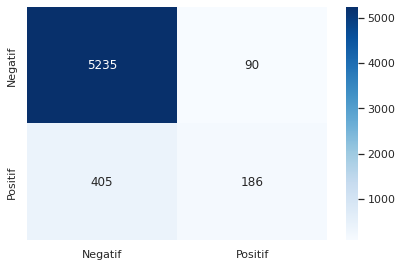

In [ ]:
# Cek confusion matrix
cf_matrix_knn = confusion_matrix(y_test, best_pipe_knn.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_knn, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

Pada hasil confussion matrix model Logistic Regression terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5235 dan 90 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 186 dan 405 terprediksi salah sebagai 0 (No)

In [ ]:
print(classification_report(y_test, best_pipe_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5325
           1       0.67      0.31      0.43       591

    accuracy                           0.92      5916
   macro avg       0.80      0.65      0.69      5916
weighted avg       0.90      0.92      0.90      5916



Pada classification report model KNN terlihat bahwa:
*   Precision untuk kelas 0 sebesar 93%, untuk kelas 1 sebesar 67%
*   Recall untuk kelas 0 sebesar 98%, untuk kelas 1 sebesar 31%
*   F1 score untuk kelas 0 sebesar 95%, untuk kelas 1 sebesar 43%

###10.6 XGBOOST CLASSIFIER


             
             'scaler': [StandardScaler(),MinMaxScaler()],
             'classifier__learning_rate':[0.1,0.01,0.001],
             'classifier__n_estimators':np.arange(100,501,100),
             'classifier__max_depth':np.arange(2,8)

In [ ]:
grid_xgb = GridSearchCV(pipe_xgb, param_xgb, cv=5).fit(X_train, y_train)

Model XGBoost Classifier di train dengan Grid Search Cross Validation dengan jumlah fold k = 5 selama 55 menit 28 detik

In [ ]:
print('Training set score: ' + str(grid_xgb.score(X_train, y_train)))
print('Test set score: ' + str(grid_xgb.score(X_test, y_test)))

Training set score: 0.9329304877003515
Test set score: 0.9254563894523327


Setelah di tuning model XGBoost maka dihasilkan akurasi untuk training sebesar 93.29% dan testing sebesar 92.54%

In [ ]:
# Access the best set of parameters
best_params_xgb = grid_xgb.best_params_
print(best_params_xgb)

# simpan optimum model
best_pipe_xgb = grid_xgb.best_estimator_
print(best_pipe_xgb)
 
result_df_xgb = pd.DataFrame.from_dict(grid_xgb.cv_results_, orient='columns')
print(result_df_xgb.columns)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'scaler': StandardScaler()}
Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(n_estimators=200, random_state=28))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__learning_rate', 'param_classifier__max_depth',
       'param_classifier__n_estimators', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


*   classifier__learning_rate terbaik untuk digunakan dalam kasus ini adalah sebesar 0.1
*   classifier__max_depth terbaik untuk digunakan dalam kasus ini adalah sebesar 3
*   classifier__n_estimators terbaik untuk digunakan dalam kasus ini adalah sebesar 200
*   scaler terbaik untuk digunakan dalam kasus ini adalah sebesar StandardScaler

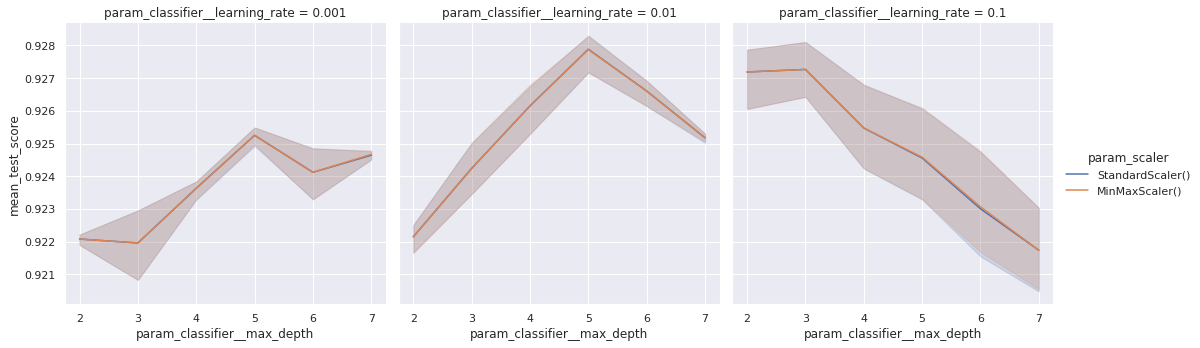

In [ ]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_xgb,
	kind='line',
	x='param_classifier__max_depth',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__learning_rate')
plt.show()

Dari gambar diatas dapat kita lihat bahwa *max_depth* dan *learning_rate* pada XGBoost Classifier sangat berpengaruh.

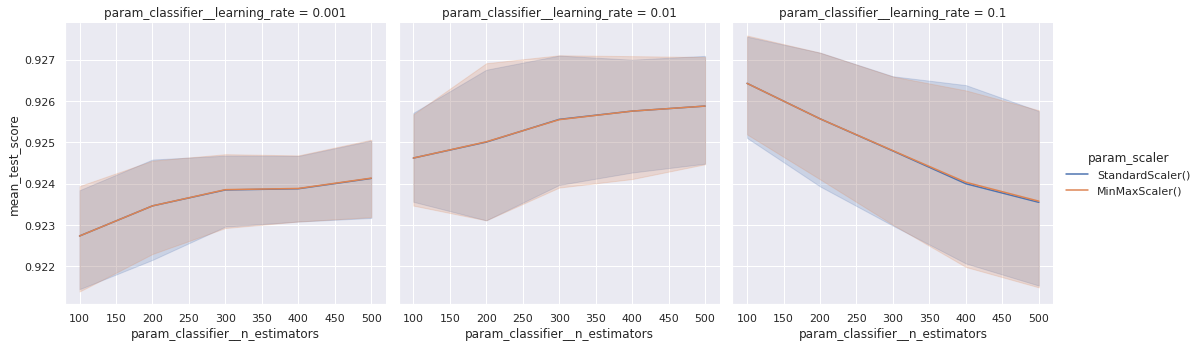

In [ ]:
# figure size
sns.set(rc={'figure.figsize':(20,10)})
sns.relplot(data=result_df_xgb,
	kind='line',
	x='param_classifier__n_estimators',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__learning_rate')
plt.show()

Dari gambar diatas dapat kita lihat bahwa *n_estimators* pada XGBoost Classifier sangat berpengaruh terhadap score model. Namun, penentuan scaler pada model boosting ini sangat tidak berpengaruh.

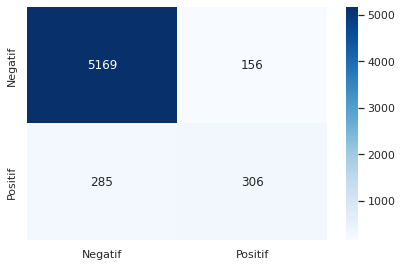

In [ ]:
cf_matrix_xgb = confusion_matrix(y_test, best_pipe_xgb.predict(X_test))

# figure size
sns.set(rc={'figure.figsize':(6,4)})

#plotting confusion matrix
ax = sns.heatmap(cf_matrix_xgb, annot=True,cmap='Blues', fmt='g')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.show()

Pada hasil confussion matrix model Logistic Regression terlihat bahwa:
*   Pada kelas 0 (No) untuk prediksi y pada data test terprediksi benar sebanyak 5169 dan 156 terprediksi salah sebagai 1 (Yes)
*   Pada kelas 1 (Yes) untuk prediksi y pada data test terprediksi benar sebanyak 306 dan 285 terprediksi salah sebagai 0 (No)

In [ ]:
print(classification_report(y_test, best_pipe_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5325
           1       0.66      0.52      0.58       591

    accuracy                           0.93      5916
   macro avg       0.81      0.74      0.77      5916
weighted avg       0.92      0.93      0.92      5916



Pada classification report model KNN terlihat bahwa:
*   Precision untuk kelas 0 sebesar 95%, untuk kelas 1 sebesar 66%
*   Recall untuk kelas 0 sebesar 97%, untuk kelas 1 sebesar 52%
*   F1 score untuk kelas 0 sebesar 96%, untuk kelas 1 sebesar 58%

#11. PERBANDINGAN MODEL

###11.1 PERBANDINGAN MODEL SEBELUM DITUNING

In [ ]:
log_notun = pipe_log.score(X_test, y_test)
svm_notun = pipe_svm.score(X_test, y_test)
dt_notun = pipe_dt.score(X_test, y_test)
rf_notun = pipe_rf.score(X_test, y_test)
knn_notun = pipe_knn.score(X_test, y_test)
xgb_notun = pipe_xgb.score(X_test, y_test)

print(round(log_notun,4))
print(round(svm_notun,4))
print(round(dt_notun,4))
print(round(rf_notun,4))
print(round(knn_notun,4))
print(round(xgb_notun,4))

0.9106
0.9184
0.9185
0.9192
0.9043
0.9258


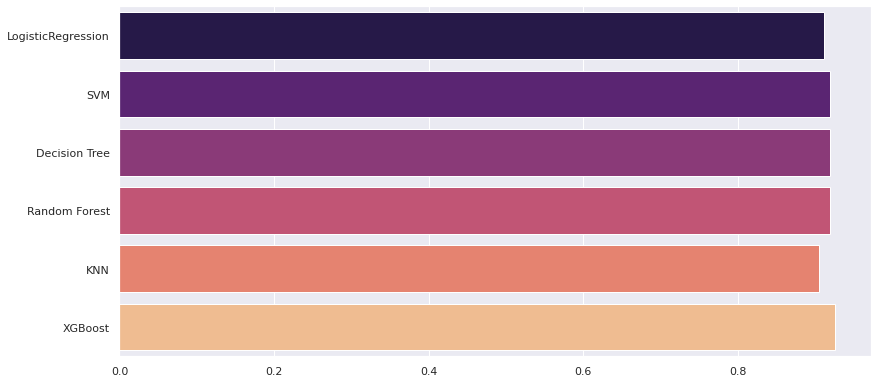

In [ ]:
plt.figure(figsize=(12,6))
model_acc_notun = [log_notun, svm_notun, dt_notun, rf_notun, knn_notun, xgb_notun]
model_name_notun = ['LogisticRegression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost']
sns.barplot(x= model_acc_notun, y=model_name_notun, palette='magma')

In [ ]:
from sklearn.metrics import f1_score, recall_score

models_notun = {
    'log_notun':pipe_log,
    'svm_notun':pipe_svm,
    'dt_notun':pipe_dt,
    'rf_notun':pipe_rf,
    'knn_notun':pipe_knn,
    'xgb_notun':pipe_xgb
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score
}

bank_model_notun = pd.DataFrame(columns=models_notun.keys(), index=['f1_score','recall'])

for metric in metrics.keys():
    for model in models_notun.keys():
        bank_model_notun.loc[metric, model] = metrics[metric](y_test, models_notun[model].predict(X_test))

In [ ]:
bank_model_notun

,log_notun,svm_notun,dt_notun,rf_notun,knn_notun,xgb_notun
f1_score,0.431794,0.465116,0.581597,0.537718,0.306373,0.590103
recall,0.340102,0.35533,0.566836,0.470389,0.211506,0.534687


###11.2 PERBANDINGAN MODEL SETELAH TUNING 

In [ ]:
log = grid_log.score(X_test, y_test)
svm = grid_svm.score(X_test, y_test)
dt = grid_dt.score(X_test, y_test)
rf = grid_rf.score(X_test, y_test)
knn = grid_knn.score(X_test, y_test)
xgb = grid_xgb.score(X_test, y_test)

print(round(log,4))
print(round(svm,4))
print(round(dt,4))
print(round(rf,4))
print(round(knn,4))
print(round(xgb,4))

0.9108
0.9212
0.9207
0.9241
0.9163
0.9255


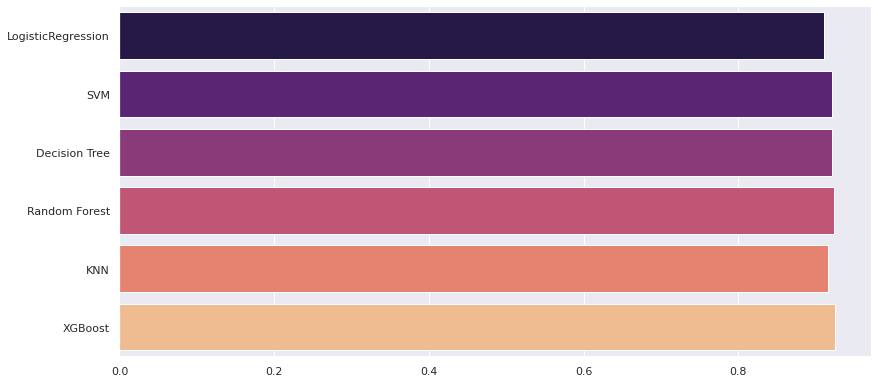

In [ ]:
plt.figure(figsize=(12,6))
model_acc = [log, svm, dt, rf, knn, xgb]
model_name = ['LogisticRegression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'XGBoost']
sns.barplot(x= model_acc, y=model_name, palette='magma')

In [ ]:
from sklearn.metrics import f1_score, recall_score

models = {
    'log':best_pipe_log,
    'svm':best_pipe_svm,
    'dt':best_pipe_dt,
    'rf':best_pipe_rf,
    'knn':best_pipe_knn,
    'xgb':best_pipe_xgb
}
metrics = {
    'f1_score':f1_score,
    'recall':recall_score
}

bank_model = pd.DataFrame(columns=models.keys(), index=['f1_score','recall'])

for metric in metrics.keys():
    for model in models.keys():
        bank_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test))

In [ ]:
bank_model

,log,svm,dt,rf,knn,xgb
f1_score,0.432258,0.5074,0.568537,0.560235,0.429066,0.581197
recall,0.340102,0.406091,0.522843,0.483926,0.314721,0.517766


###11.3 PERBANDINGAN AKURASI BEFORE DAN AFTER TUNING MODEL

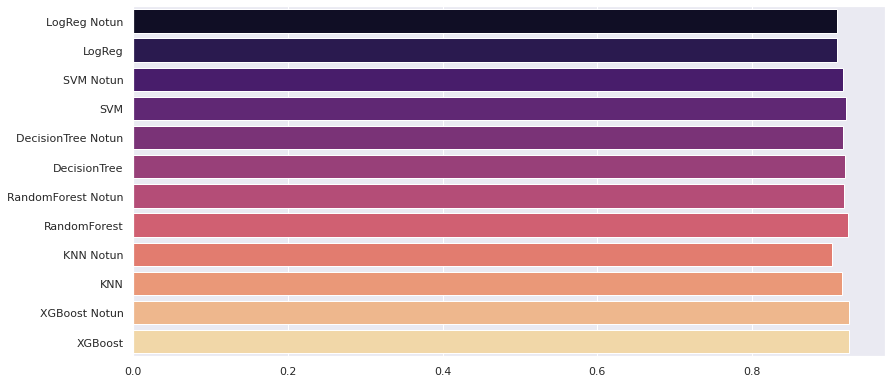

In [ ]:
plt.figure(figsize=(12,6))
model_acc_notun = [log_notun, log, svm_notun, svm, dt_notun, dt, rf_notun, rf, knn_notun, knn, xgb_notun, xgb]
model_name_notun = ['LogReg Notun', 'LogReg', 'SVM Notun', 'SVM', 'DecisionTree Notun', 'DecisionTree', 'RandomForest Notun', 'RandomForest', 'KNN Notun', 'KNN', 'XGBoost Notun', 'XGBoost']
sns.barplot(x= model_acc_notun, y=model_name_notun, palette='magma')

Terlihat bahwa terjadi peningkatan akurasi setelah model dituning. Performansi model lebih baik setelah dituning dibandingkan sebelum model di tuning.

#12. MODEL INFERENCE

###12.1 LOGISTIC REGRESSION INFERENCE

In [ ]:
print(bank['job'].unique())
print(X['job'].unique())
print(bank['marital'].unique())
print(X['marital'].unique())
print(bank['education'].unique())
print(X['education'].unique())
print(bank['month'].unique())
print(X['month'].unique())

['housemaid' 'services' 'admin.' 'technician' 'blue-collar' 'unemployed'
 'retired' 'management' 'entrepreneur' 'student' 'self-employed' 'unknown']
[ 3  7  0  9  1 10  5  4  2  8  6 11]
['married' 'single' 'divorced' 'unknown']
[1 2 0 3]
['basic.4y' 'high.school' 'basic.6y' 'professional.course' 'basic.9y'
 'university.degree' 'unknown' 'illiterate']
[0 3 1 5 2 6 7 4]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
[6 4 3 1 8 7 2 5 0 9]


Pada data baru diketahui bahwa seorang prospek dengan informasi sebagai berikut:
*   Pekerjaan admin (job = 0)
*   Belum menikah (marital = 2)
*   Pendidikan terakhir university.degree (education = 6)
*   Di prospek pada bulan juni (month = 4)
*   Durasi 289
*   nr_employed 5195.8
*   euribor3m 1.498
*   emp.var.rate 1.4
*   previous 4

**Apakah prospek baru akan melakukan deposit?**

In [ ]:
pred_data_num = [[289, 5195.8, 1.498, 1.4, -4]]
pred_data_cat = [[0, 2, 6, 4]]

In [ ]:
predict_data = np.concatenate([pred_data_num, pred_data_cat], axis=1)
result = best_pipe_log.predict(predict_data)
print('Apakah prospek akan melakukan deposit?', result)

Apakah prospek akan melakukan deposit? [0]


Hasil prediksi pada model logistic regression menunjukkan bahwa prospek baru tidak akan melakukan deposit.

###12.2 SVM INFERENCE

Pada data baru diketahui bahwa seorang prospek dengan informasi sebagai berikut:
*   Pekerjaan admin (job = 0)
*   Belum menikah (marital = 2)
*   Pendidikan terakhir university.degree (education = 6)
*   Di prospek pada bulan juni (month = 4)
*   Durasi 289
*   nr_employed 5195.8
*   euribor3m 1.498
*   emp.var.rate 1.4
*   previous 4

**Apakah prospek baru akan melakukan deposit?**

In [ ]:
pred_data_num = [[289, 5195.8, 1.498, 1.4, -4]]
pred_data_cat = [[0, 2, 6, 4]]

In [ ]:
predict_data = np.concatenate([pred_data_num, pred_data_cat], axis=1)
result = best_pipe_svm.predict(predict_data)
print('Apakah prospek akan melakukan deposit?', result)

Apakah prospek akan melakukan deposit? [0]


Hasil prediksi pada model SVM menunjukkan bahwa prospek baru tidak akan melakukan deposit.

###12.3 DECISION TREE INFERENCE

Pada data baru diketahui bahwa seorang prospek dengan informasi sebagai berikut:
*   Pekerjaan admin (job = 0)
*   Belum menikah (marital = 2)
*   Pendidikan terakhir university.degree (education = 6)
*   Di prospek pada bulan juni (month = 4)
*   Durasi 289
*   nr_employed 5195.8
*   euribor3m 1.498
*   emp.var.rate 1.4
*   previous 4

**Apakah prospek baru akan melakukan deposit?**

In [ ]:
pred_data_num = [[289, 5195.8, 1.498, 1.4, -4]]
pred_data_cat = [[0, 2, 6, 4]]

In [ ]:
predict_data = np.concatenate([pred_data_num, pred_data_cat], axis=1)
result = best_pipe_dt.predict(predict_data)
print('Apakah prospek akan melakukan deposit?', result)

Apakah prospek akan melakukan deposit? [0]


Hasil prediksi pada model decision tree menunjukkan bahwa prospek baru tidak akan melakukan deposit.

###12.4 RANDOM FOREST INFERENCE

Pada data baru diketahui bahwa seorang prospek dengan informasi sebagai berikut:
*   Pekerjaan admin (job = 0)
*   Belum menikah (marital = 2)
*   Pendidikan terakhir university.degree (education = 6)
*   Di prospek pada bulan juni (month = 4)
*   Durasi 289
*   nr_employed 5195.8
*   euribor3m 1.498
*   emp.var.rate 1.4
*   previous 4

**Apakah prospek baru akan melakukan deposit?**

In [ ]:
pred_data_num = [[289, 5195.8, 1.498, 1.4, -4]]
pred_data_cat = [[0, 2, 6, 4]]

In [ ]:
predict_data = np.concatenate([pred_data_num, pred_data_cat], axis=1)
result = best_pipe_dt.predict(predict_data)
print('Apakah prospek akan melakukan deposit?', result)

Apakah prospek akan melakukan deposit? [0]


Hasil prediksi pada model random forest menunjukkan bahwa prospek baru tidak akan melakukan deposit.

###12.5 KNN INFERENCE

Pada data baru diketahui bahwa seorang prospek dengan informasi sebagai berikut:
*   Pekerjaan admin (job = 0)
*   Belum menikah (marital = 2)
*   Pendidikan terakhir university.degree (education = 6)
*   Di prospek pada bulan juni (month = 4)
*   Durasi 289
*   nr_employed 5195.8
*   euribor3m 1.498
*   emp.var.rate 1.4
*   previous 4

**Apakah prospek baru akan melakukan deposit?**

In [ ]:
pred_data_num = [[289, 5195.8, 1.498, 1.4, -4]]
pred_data_cat = [[0, 2, 6, 4]]

In [ ]:
predict_data = np.concatenate([pred_data_num, pred_data_cat], axis=1)
result = best_pipe_knn.predict(predict_data)
print('Apakah prospek akan melakukan deposit?', result)

Apakah prospek akan melakukan deposit? [0]


Hasil prediksi pada model decision tree menunjukkan bahwa prospek baru tidak akan melakukan deposit.

###12.6 XGBOOST INFERENCE

Pada data baru diketahui bahwa seorang prospek dengan informasi sebagai berikut:
*   Pekerjaan admin (job = 0)
*   Belum menikah (marital = 2)
*   Pendidikan terakhir university.degree (education = 6)
*   Di prospek pada bulan juni (month = 4)
*   Durasi 289
*   nr_employed 5195.8
*   euribor3m 1.498
*   emp.var.rate 1.4
*   previous 4

**Apakah prospek baru akan melakukan deposit?**

In [ ]:
pred_data_num = [[289, 5195.8, 1.498, 1.4, -4]]
pred_data_cat = [[0, 2, 6, 4]]

In [ ]:
predict_data = np.concatenate([pred_data_num, pred_data_cat], axis=1)
result = best_pipe_xgb.predict(predict_data)
print('Apakah prospek akan melakukan deposit?', result)

Apakah prospek akan melakukan deposit? [0]


Hasil prediksi pada model decision tree menunjukkan bahwa prospek baru tidak akan melakukan deposit.

#13. KESIMPULAN

###13.1 MODEL ANALYSIS

Dari project yang saya buat terdapat beberapa fitur numerik yang berkolerasi tinggi (+0.20) yaitu:

1. duration (0.41)
2. nr.employed(0.35)
3. euriborn3m(0.31)
4. emp.var.rate(0.30)
5. previous(0.23)

Based on EDA analysis, saya memutuskan untuk menggunakan empat fitur pada fitur kategorik, yaitu:
1. job
2. marital
3. education
4. month


#####13.1.1 RESULT TRAIN BASE MODEL

Dari 9 fitur tersebut kemudian saya membuat beberapa model dan melakukan pelatihan dan evaluasi model tanpa parameter (with out tuning), menghasilkan:
1. Logistic Regression Classifier
    - Accuracy = Training Score:  0.9198, Testing Score:  0.9106
2. SVM
    - Accuracy = Training Score:  0.9268, Testing Score:  0.9184
3. Decision Tree Classifier
    - Accuracy = Training Score:  0.9223, Testing Score:  0.9185
4. Random Forest Classifier
    - Accuracy = Training Score:  0.9997, Testing Score:  0.919
5. KNN Classifier
    - Accuracy = Training Score:  0.9486, Testing Score:  0.9043
6. XGBoost Classifier
    - Accuracy = Training Score:  0.9303, Testing Score:  0.9258

#####13.1.2 RESULT GRID SEARCH DENGAN CROSS VALIDATION (K = 5)

Dari 9 fitur tersebut kemudian saya membuat beberapa model dan melakukan GridSearchCV (cv = 5) dengan beberapa parameter:
1. Logistic Regression Classifier
    - Best Parameters = (C = 0.1, penalty = 'l1', random_state = 28, solver = 'liblinear', sedangkan yang lainnya default)
    - Accuracy = Training set score: 0.91 dan Test set score: 0.90
2. SVM
    - Best Parameters = (C = 10, gamma = 1 dan yang lainnya default)
    - Accuracy = Training set score: 0.92 dan Test set score: 0.92
3. Decision Tree Classifier
    - Best Parameters = (criterion = 'entropy', max_depth = 7, max_features='auto', min_samples_leaf=4 dan yang lainnya default)
    - Accuracy = Training set score: 0.93 dan Test set score: 0.92
4. Random Forest Classifier
    - Best Parameters = (max_depth = 10, max_features = 3, min_samples_leaf = 4, min_samples_split = 10 dan yang lainnya default)
    - Accuracy = Training set score: 0.94 dan Test set score: 0.92
5. KNN Classifier
    - Best Parameters = (learning_rate= 0.1, max_depth= 2, n_estimators': 200, dan yang lainnya default)
    - Accuracy = Training set score: 0.92 dan Test set score: 0.91
6. XGBoost Classifier
    - Best Parameters = (learning_rate = 0.01, max_depth = 5, n_estimators = 400, sedangkan yang lainnya default)
    - Accuracy = Training set score: 0.93 dan Test set score: 0.92

#####13.1.3 BEST MODEL

Dari model yang dibuat pemilihan teknik feature scaling atau normalisasi pada model hanya berpengengaruh untuk model yang linear seperti Logistic Regression dan SVM, sedangkan untuk model non-linear seperti Decision Tree Classifier, Random Forest Classifier, KNN Classifier dan XGBoost Classifier tidak berpengaruh.

Model yang terbaik adalah XGBoost Classifier dengan accuracy, F1-Score, Recall, Precision yang lebih tinggi

#####13.1.4 MODEL INFERENCE

Pada data baru diketahui bahwa seorang prospek dengan informasi sebagai berikut:
*   Pekerjaan admin (job = 0)
*   Belum menikah (marital = 2)
*   Pendidikan terakhir university.degree (education = 6)
*   Di prospek pada bulan juni (month = 4)
*   Durasi 289
*   nr_employed 5195.8
*   euribor3m 1.498
*   emp.var.rate 1.4
*   previous 4

**Apakah prospek baru akan melakukan deposit?**

Keenam model yang telah dibangun memiliki hasil prediksi yang sama. Dengan keadaan yang ada pada data prediksi keenam model tersebut memprediksi bahwa pada **prospek tidak akan melakukan deposit**

###13.2 EDA ANALYSIS

**KESIMPULAN BASED ON EDA**

---

*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan rentang usia 30-40
*   Prospek dengan rentang usia 30-40 banyak melakukan deposit
*   Sosialisasi/kampanye partisipannya banyak di dominasi oleh prospek dengan job admin dan blue-collar usia 30-40
*   Prospek yang bekerja di posisi administrasi membuat deposit paling tinggi diikuti oleh teknisi dan karyawan blue-collar
*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan marital status married
*   Prospek yang sudah menikah telah membuat setoran tinggi dan diikuti oleh single
*   Sosialisasi/kampanye partisipannya banyak di dominiasi oleh prospek dengan education status university.degree dan high.school
*   Prospek yang memiliki setidaknya gelar universitas telah melakukan setoran diikuti oleh sekolah menengah
*   Terlihat bahwa prospek dengan default no deposit mendominasi data yang kita miliki
*   Prospek no default lebih banyak melakukan deposit dibandingkan dengan kategori default lainnya
*   Terlihat bahwa prospek yang memiliki housing loan (pinjaman/kredit rumah) mendominasi data yang kita miliki
*   Prospek yang memiliki housing loan (pinjaman/kredit rumah) lebih banyak melakukan deposit dibandingkan dengan prospek yang tidak memiliki housing loan
*   Terlihat bahwa prospek yang tidak memiliki personal loan (pinjaman/kredit pribadi) mendominasi data yang kita miliki
*   Prospek yang tidak memiliki personal loan (pinjaman/kredit pribadi) lebih banyak melakukan deposit dibandingkan dengan prospek yang memiliki personal loan
*   Kampanye/sosialisasi lebih banyak dilakukan melalui cellular contact
*   Prospek positif banyak didapatkan melalui cellular contact
*   Prospek lebih banyak ditemukan pada hari senin selama berjalannya kampanye/sosialisasi
*   Prospek positif banyak didapatkan pada hari rabu selama berjalannya kampanye/sosialisasi
*   Semakin banyak durasi panggilan, prospek memiliki kemungkinan lebih tinggi dalam melakukan deposit 
*   Durasi panggilan memudar saat periode waktu kampanye diperpanjang
*   Ada banyak prospek positif di hari-hari awal kampanye
*   Kita bisa melihat kampanye sebagian besar terkonsentrasi di awal periode bank (Mei, Juni dan Juli)
*   Biasanya masa pendidikan dimulai pada saat itu sehingga ada kemungkinan orang tua menyetor atas nama anaknya
*   Mereka juga melakukan kampanye di akhir periode bank.